**Distfit** is a python package for probability density fitting of univariate distributions for random variables. It can find the best fit for parametric, non-parametric, and discrete distributions. In addition, it provides visual insights for better decision-making using various plots. A summary of the most important functionalities:

- **Finds the best fit** for parametric, non-parametric, and discrete distributions.

- **Prediction** of outliers/novelties for (new) unseen samples.

- **Generates synthetic data** based on the fitted distribution.

- **Plots:** Histograms, Probability Density Function plots, Cumulative Density Function plots (CDF), Histograms, Quantile-Quantile plots (QQ-plot), Probability plots, and Summary plots.

- **Saving and loading** models.

The distfit library can determine the best fit across 89 theoretical distributions which are utilized from the scipy library. To score the fit, there are four goodness-of-fit statistical tests; Residual Sum of Squares (RSS or SSE), Wasserstein, Kolmogorov-Smirnov (KS), and Energy. For each fitted theoretical distribution, the loc, scale, and arg parameters are returned, such as mean and standard deviation for normal distribution.

In the following example, we will generate data from the normal distribution with `mean=2` and `standard deviation=4`. We will use **distfit** to estimate these two parameters from the data itself. If you already know the family of distributions (e.g., bell-shape), you can specify a subset of distributions. The default is a subset of common distributions (as depicted in Figure 1). *Note that due to the stochastic component, results can differ from what I am showing when repeating the experiment.*

# How to identify the best fit using parametric fitting?

In [1]:
# Import libraries
import numpy as np
from distfit import distfit
import matplotlib.pyplot as plt

In [2]:
# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

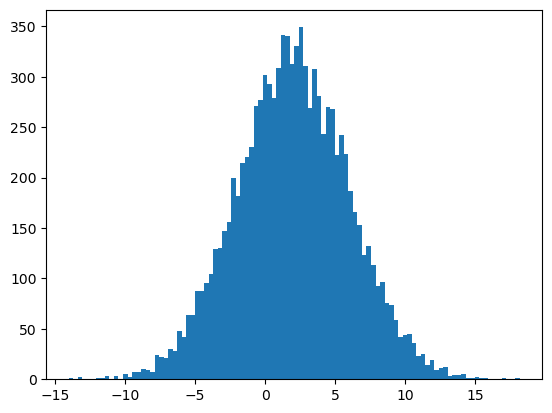

In [3]:
# Check the distribution of the created data
plt.figure()
plt.hist(X, bins=100)
plt.show();

In [4]:
# Initialize using the parametric approach.
dfit = distfit(method='parametric', todf=True)

In [5]:
# # Alternatively limit the search for only a few theoretical distributions.
# dfit = distfit(method='parametric', todf=True, distr=['norm', 'expon'])

In [6]:
# Fit model on input data X.
dfit.fit_transform(X)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000421977] [loc=1.980 scale=3.988]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.109659] [loc=-14.007 scale=15.987]
[distfit] >INFO> [pareto    ] [0.29 sec] [RSS: 0.109164] [loc=-1840260.530 scale=1840246.522]
[distfit] >INFO> [dweibull  ] [0.06 sec] [RSS: 0.00201083] [loc=1.918 scale=3.399]
[distfit] >INFO> [t         ] [0.08 sec] [RSS: 0.000418228] [loc=1.979 scale=3.973]
[distfit] >INFO> [genextreme] [0.49 sec] [RSS: 0.00118641] [loc=0.442 scale=3.954]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 0.000421887] [loc=-4209.455 scale=0.004]
[distfit] >INFO> [lognorm   ] [0.26 sec] [RSS: 0.0004354] [loc=-257.226 scale=259.173]
[distfit] >INFO> [beta      ] [0.13 sec] [RSS: 0.000421816] [loc=-4118.915 scale=62690.595]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0807344] [loc=-14.007 scale=32.172]
[distfit] >INFO> [loggamma  ] [0.11 sec] [RSS: 0.000430914] [loc=-917.378 scale=131.555]

{'model': {'name': 't',
  'score': 0.00041822793598433953,
  'loc': 1.9794715811293107,
  'scale': 3.973062885548705,
  'arg': (261.56270379069656,),
  'params': (261.56270379069656, 1.9794715811293107, 3.973062885548705),
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x244a0f2ed88>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': -4.578863629096061,
  'CII_max_alpha': 8.53780679135468},
 'summary':           name     score             loc           scale  \
 0            t  0.000418        1.979472        3.973063   
 1         beta  0.000422    -4118.915173    62690.594623   
 2        gamma  0.000422     -4209.45479        0.003777   
 3         norm  0.000422        1.979503         3.98834   
 4     loggamma  0.000431     -917.378305      131.555028   
 5      lognorm  0.000435     -257.226371      259.172931   
 6   genextreme  0.001186        0.441833        3.954353   
 7     dweibull  0.002011        1.918474        3.399

In [7]:
# Print the bet model results.
dfit.model

{'name': 't',
 'score': 0.00041822793598433953,
 'loc': 1.9794715811293107,
 'scale': 3.973062885548705,
 'arg': (261.56270379069656,),
 'params': (261.56270379069656, 1.9794715811293107, 3.973062885548705),
 'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x244a0f2ed88>,
 'bootstrap_score': 0,
 'bootstrap_pass': None,
 'color': '#e41a1c',
 'CII_min_alpha': -4.578863629096061,
 'CII_max_alpha': 8.53780679135468}

In [8]:
# Print the scores of the distributions:
dfit.summary[['name', 'score', 'loc', 'scale']]

,name,score,loc,scale
0,t,0.000418,1.979472,3.973063
1,beta,0.000422,-4118.915173,62690.594623
2,gamma,0.000422,-4209.45479,0.003777
3,norm,0.000422,1.979503,3.98834
4,loggamma,0.000431,-917.378305,131.555028
5,lognorm,0.000435,-257.226371,259.172931
6,genextreme,0.001186,0.441833,3.954353
7,dweibull,0.002011,1.918474,3.399212
8,uniform,0.080734,-14.007357,32.172208
9,pareto,0.109164,-1840260.529766,1840246.522406


[distfit] >INFO> Ploting Summary.


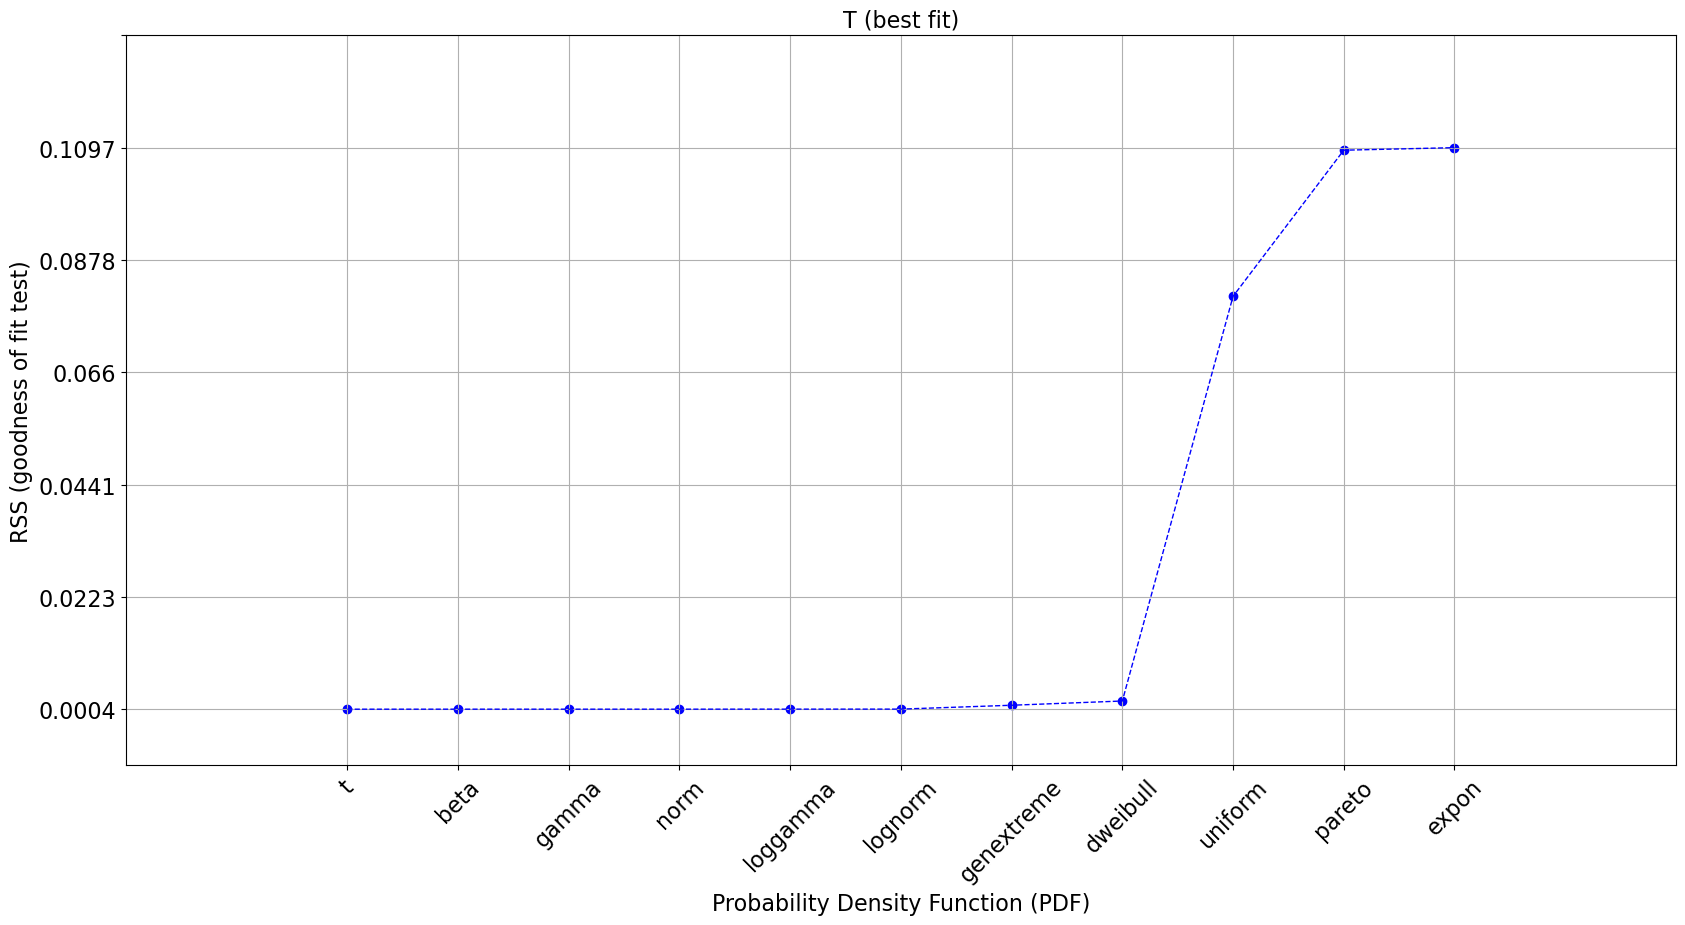

In [9]:
# Plot the RSS of the fitted distributions.
dfit.plot_summary();

> **But why did the normal distribution not have the lowest Residual Sum of Squares despite we generated random normal data?**

> Well, first of all, our input data set will always be a finite list that is bound within a (narrow) range. In contradition, the theoretical (normal) distribution goes to infinity in both directions. Secondly, all statistical analyses are based on models, and all models are merely simplifications of the real world. Or in other words, to approximate the theoretical distributions, we need to use multiple statistical tests, each with its own (dis)advantages. Finally, some distributions have a very flexible character for which the (log)gamma is a clear example. For a large k, the gamma distribution converges to normal distribution 

# Bootstrapping for more confidence

We can further validate our fitted model using a bootstrapping approach and the Kolmogorov-Smirnov (KS) test to assess the goodness of fit. If the model is overfitting, the KS test will reveal a significant difference between the bootstrapped samples and the original data, indicating that the model is not representative of the underlying distribution. In **distfit**, the `n_boots` parameter can be set during initialization or afterward (see code section).

In [10]:
# # Set bootstrapping during initialization.
# dfit = distfit(method='parametric', n_boots=100)

In [11]:
# Bootstrapping
dfit.bootstrap(X, n_boots=100)

[distfit] >INFO> Bootstrap for 11 distributions with n_boots=100
[distfit] >INFO> Bootstrap: [t         ] > Score: 0.65 > Pass 95% CII KS-test: True                                    
[distfit] >INFO> Bootstrap: [beta      ] > Score: 0.39 > Pass 95% CII KS-test: True                                    
[distfit] >INFO> Bootstrap: [gamma     ] > Score: 0.57 > Pass 95% CII KS-test: True                                    
[distfit] >INFO> Bootstrap: [norm      ] > Score: 0.6 > Pass 95% CII KS-test: True                                     
[distfit] >INFO> Bootstrap: [loggamma  ] > Score: 0.1 > Pass 95% CII KS-test: True                                     
[distfit] >INFO> Bootstrap: [lognorm   ] > Score: 0.38 > Pass 95% CII KS-test: True                                    
[distfit] >INFO> Bootstrap: [genextreme] > Score: 0.01 > Pass 95% CII KS-test: False                                   
[distfit] >INFO> Bootstrap: [dweibull  ] > Score: 0 > Pass 95% CII KS-test: False              

,name,score,loc,scale,arg,params,model,bootstrap_score,bootstrap_pass,color
0,t,0.000418,1.979472,3.973063,"(261.56270379069656,)","(261.56270379069656, 1.9794715811293107, 3.973...",<scipy.stats._distn_infrastructure.rv_frozen o...,0.65,True,#e41a1c
1,norm,0.000422,1.979503,3.98834,(),"(1.9795026591025597, 3.9883403899029637)",<scipy.stats._distn_infrastructure.rv_frozen o...,0.60,True,#e41a1c
2,gamma,0.000422,-4209.45479,0.003777,"(1115039.4808500325,)","(1115039.4808500325, -4209.454789808911, 0.003...",<scipy.stats._distn_infrastructure.rv_frozen o...,0.57,True,#377eb8
3,beta,0.000422,-4118.915173,62690.594623,"(997618.0142202035, 14179003.339960651)","(997618.0142202035, 14179003.339960651, -4118....",<scipy.stats._distn_infrastructure.rv_frozen o...,0.39,True,#4daf4a
4,lognorm,0.000435,-257.226371,259.172931,"(0.015363959274430922,)","(0.015363959274430922, -257.22637070767144, 25...",<scipy.stats._distn_infrastructure.rv_frozen o...,0.38,True,#984ea3
5,loggamma,0.000431,-917.378305,131.555028,"(1084.4278118428347,)","(1084.4278118428347, -917.3783047996494, 131.5...",<scipy.stats._distn_infrastructure.rv_frozen o...,0.10,True,#ff7f00
6,genextreme,0.001186,0.441833,3.954353,"(0.2207706991505739,)","(0.2207706991505739, 0.4418325805082869, 3.954...",<scipy.stats._distn_infrastructure.rv_frozen o...,0.01,False,#ffff33
7,dweibull,0.002011,1.918474,3.399212,"(1.2540346601111891,)","(1.2540346601111891, 1.9184743485132771, 3.399...",<scipy.stats._distn_infrastructure.rv_frozen o...,0.00,False,#a65628
8,uniform,0.080734,-14.007357,32.172208,(),"(-14.007356827036258, 32.17220778999821)",<scipy.stats._distn_infrastructure.rv_frozen o...,0.00,False,#f781bf
9,pareto,0.109164,-1840260.529766,1840246.522406,"(114164.89013435913,)","(114164.89013435913, -1840260.5297661817, 1840...",<scipy.stats._distn_infrastructure.rv_frozen o...,0.00,False,#999999


In [12]:
# Print
print(dfit.summary[['name', 'score', 'bootstrap_score', 'bootstrap_pass']])

          name     score  bootstrap_score bootstrap_pass
0            t  0.000418             0.65           True
1         norm  0.000422             0.60           True
2        gamma  0.000422             0.57           True
3         beta  0.000422             0.39           True
4      lognorm  0.000435             0.38           True
5     loggamma  0.000431             0.10           True
6   genextreme  0.001186             0.01          False
7     dweibull  0.002011             0.00          False
8      uniform  0.080734             0.00          False
9       pareto  0.109164             0.00          False
10       expon  0.109659             0.00          False


[distfit] >INFO> Ploting Summary.
[distfit] >INFO> Bootstrap results are included..


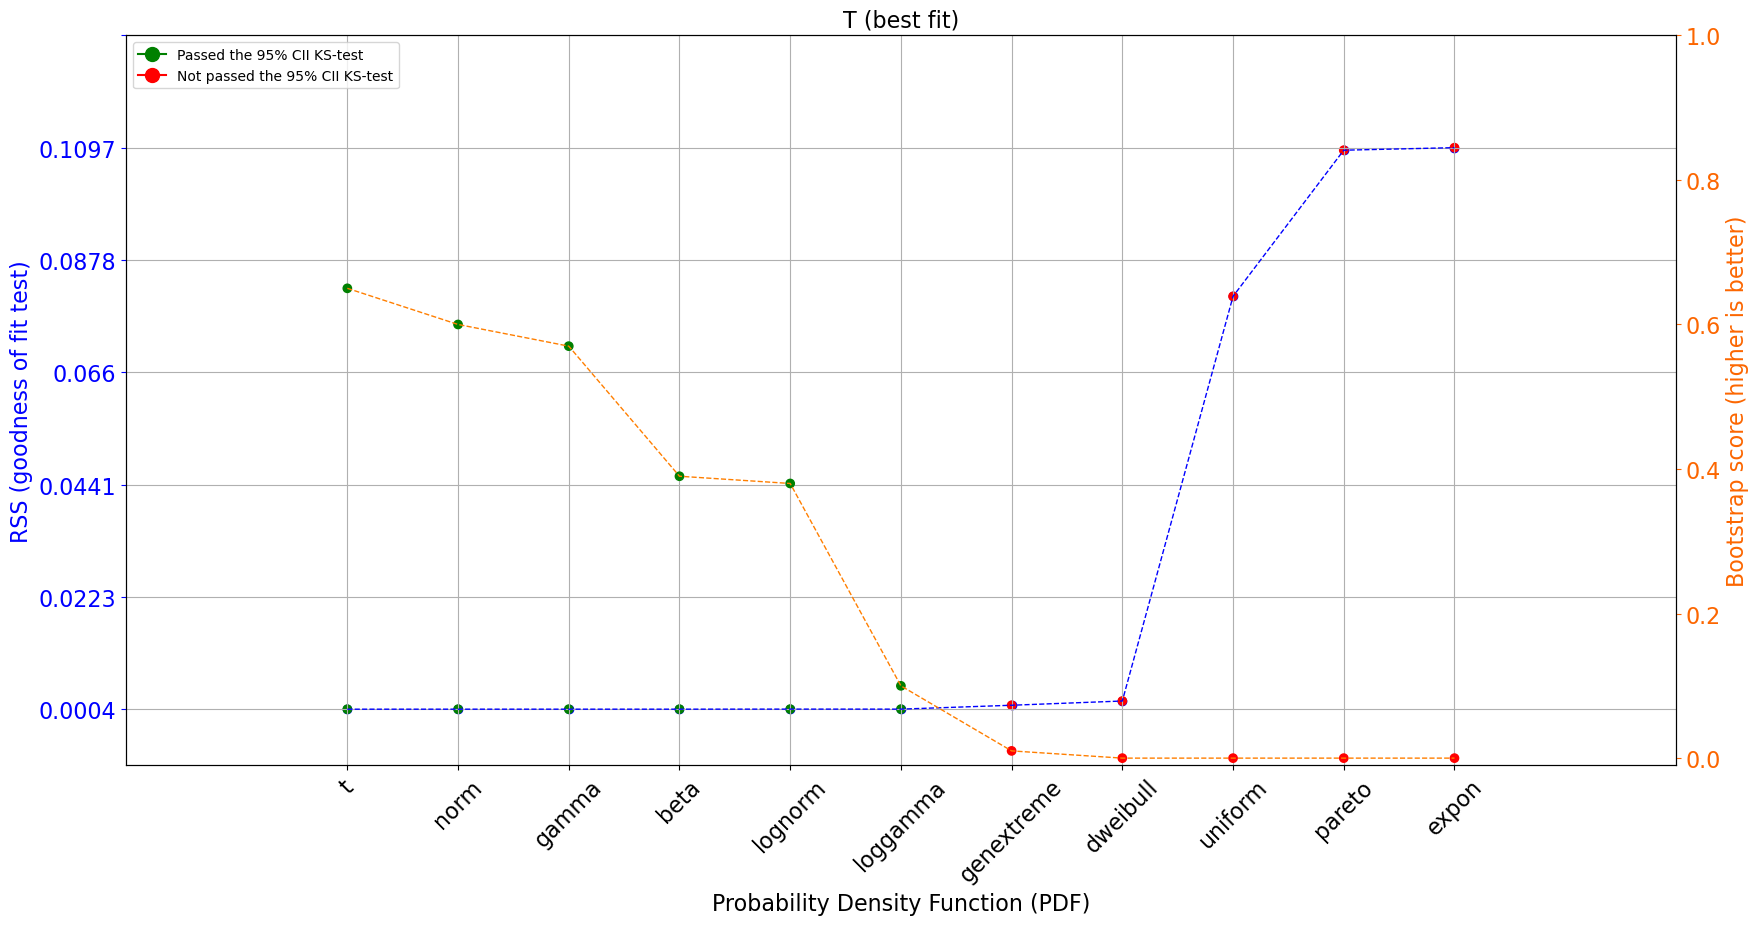

In [13]:
# Plot the RSS and bootstrap scores of the fitted distributions.
dfit.plot_summary();

It is good to realize now that the statistical tests only help you to look in the right direction, and that **choosing the best model is not only a statistical question; it is also a modeling decision.** Think about this: the `loggamma` distributions are heavily right-tailed, while the `normal` distribution is symmetrical (both tails are similar). This can make a huge difference when using confidence intervals and predicting outliers in the tails. Choose your distribution wisely so that it matches the application.

# Plots guide towards a better decision

A best practice is to use both statistics and a visual curation to decide what the best distribution fit is. Using the PDF/CDF and QQ plots can be some of the best tools to guide those decisions. As an example, Figure 2 illustrates the goodness-of-fit test statistics for which the first 7 PDFs have a very similar and low RSS score. The `dweibull` distribution is ranked number 8, with also a low RSS score. However, a visual inspection will learn us that, despite having a relatively low RSS score, it is not a good fit after all.

Let’s start plotting the empirical data using a histogram and the PDF. These plots will help to visually guide whether a distribution is a good fit. We can see in Figure 3 the PDF (left) with the confidence intervals and on the right side the CDF plot. The confidence intervals are automatically set to 95% CII but can be changed using the `alpha` parameter during initialization. When using the plot functionality, it automatically shows the histogram in bars and with a line, PDF/CDF, and confidence intervals. All these properties can be manually customized (see code section below).

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: T(loc:1.979472, scale:3.973063)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF
[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: T(loc:1.979472, scale:3.973063)


(<Figure size 2000x1500 with 1 Axes>,
 <AxesSubplot:title={'center':'\nt(df=261.563, loc=1.97947, scale=3.97306)'}, xlabel='Values', ylabel='Frequency'>)

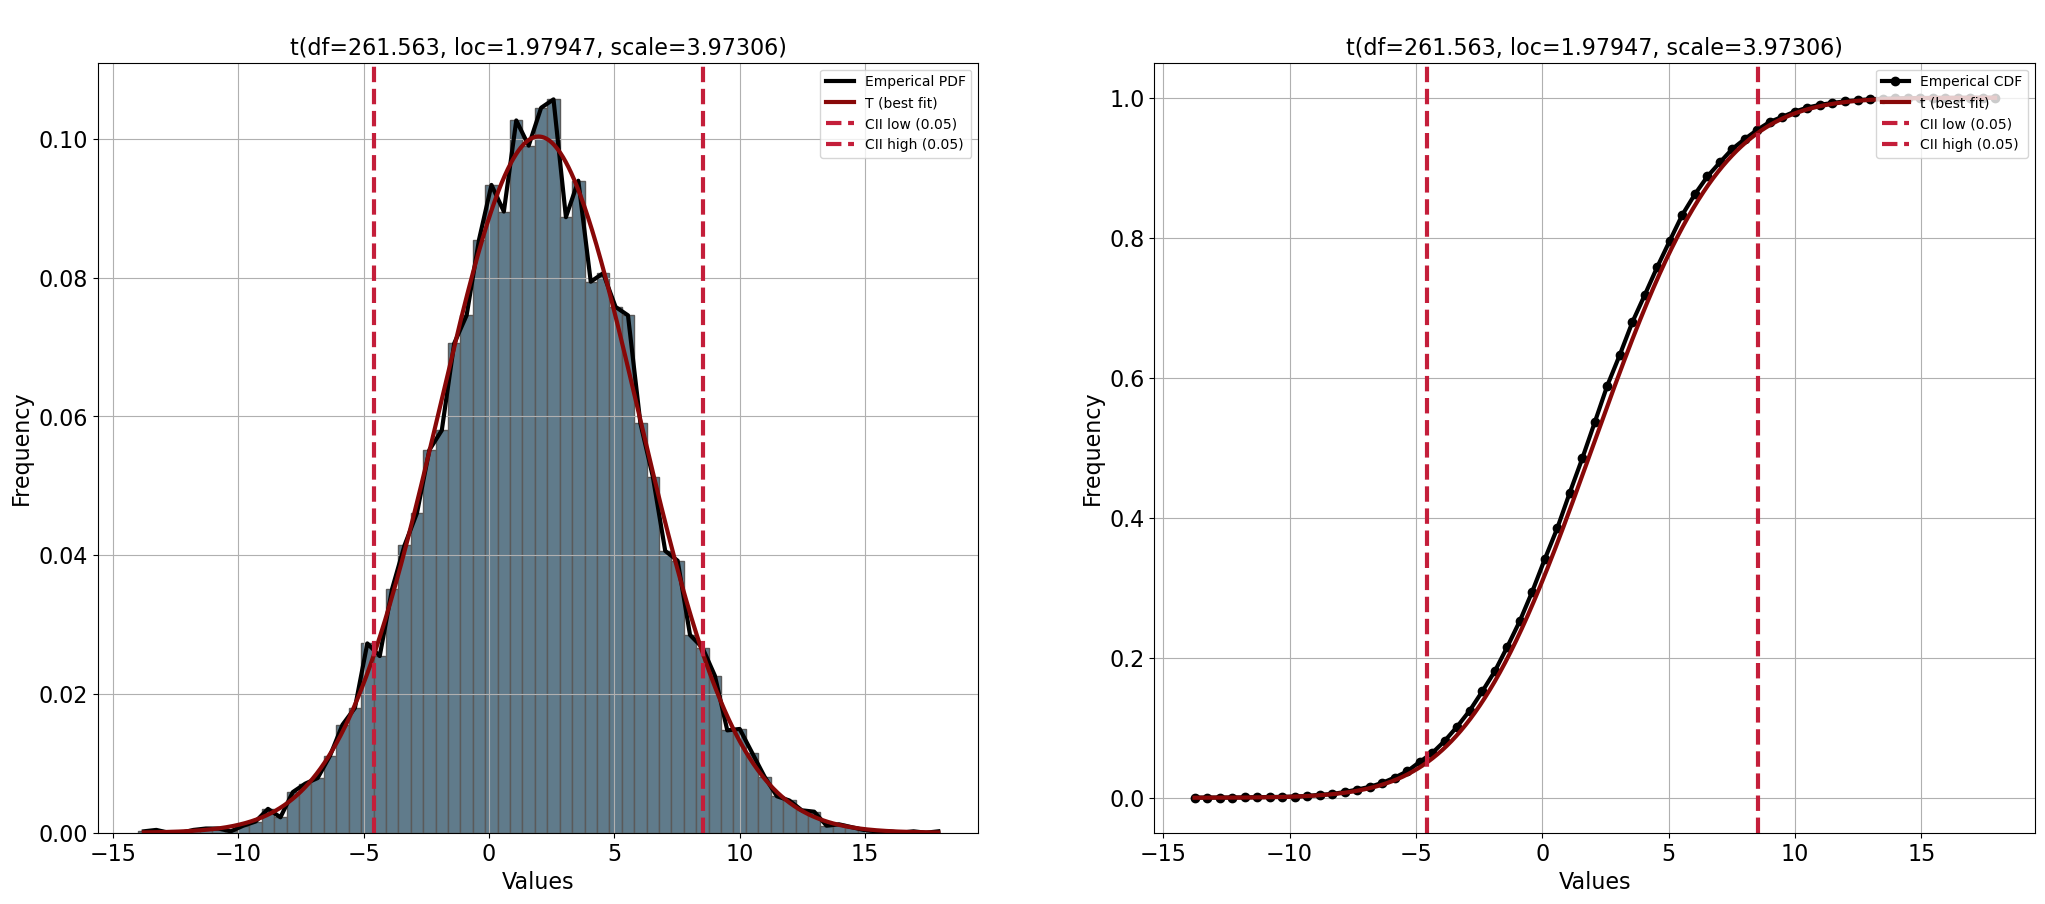

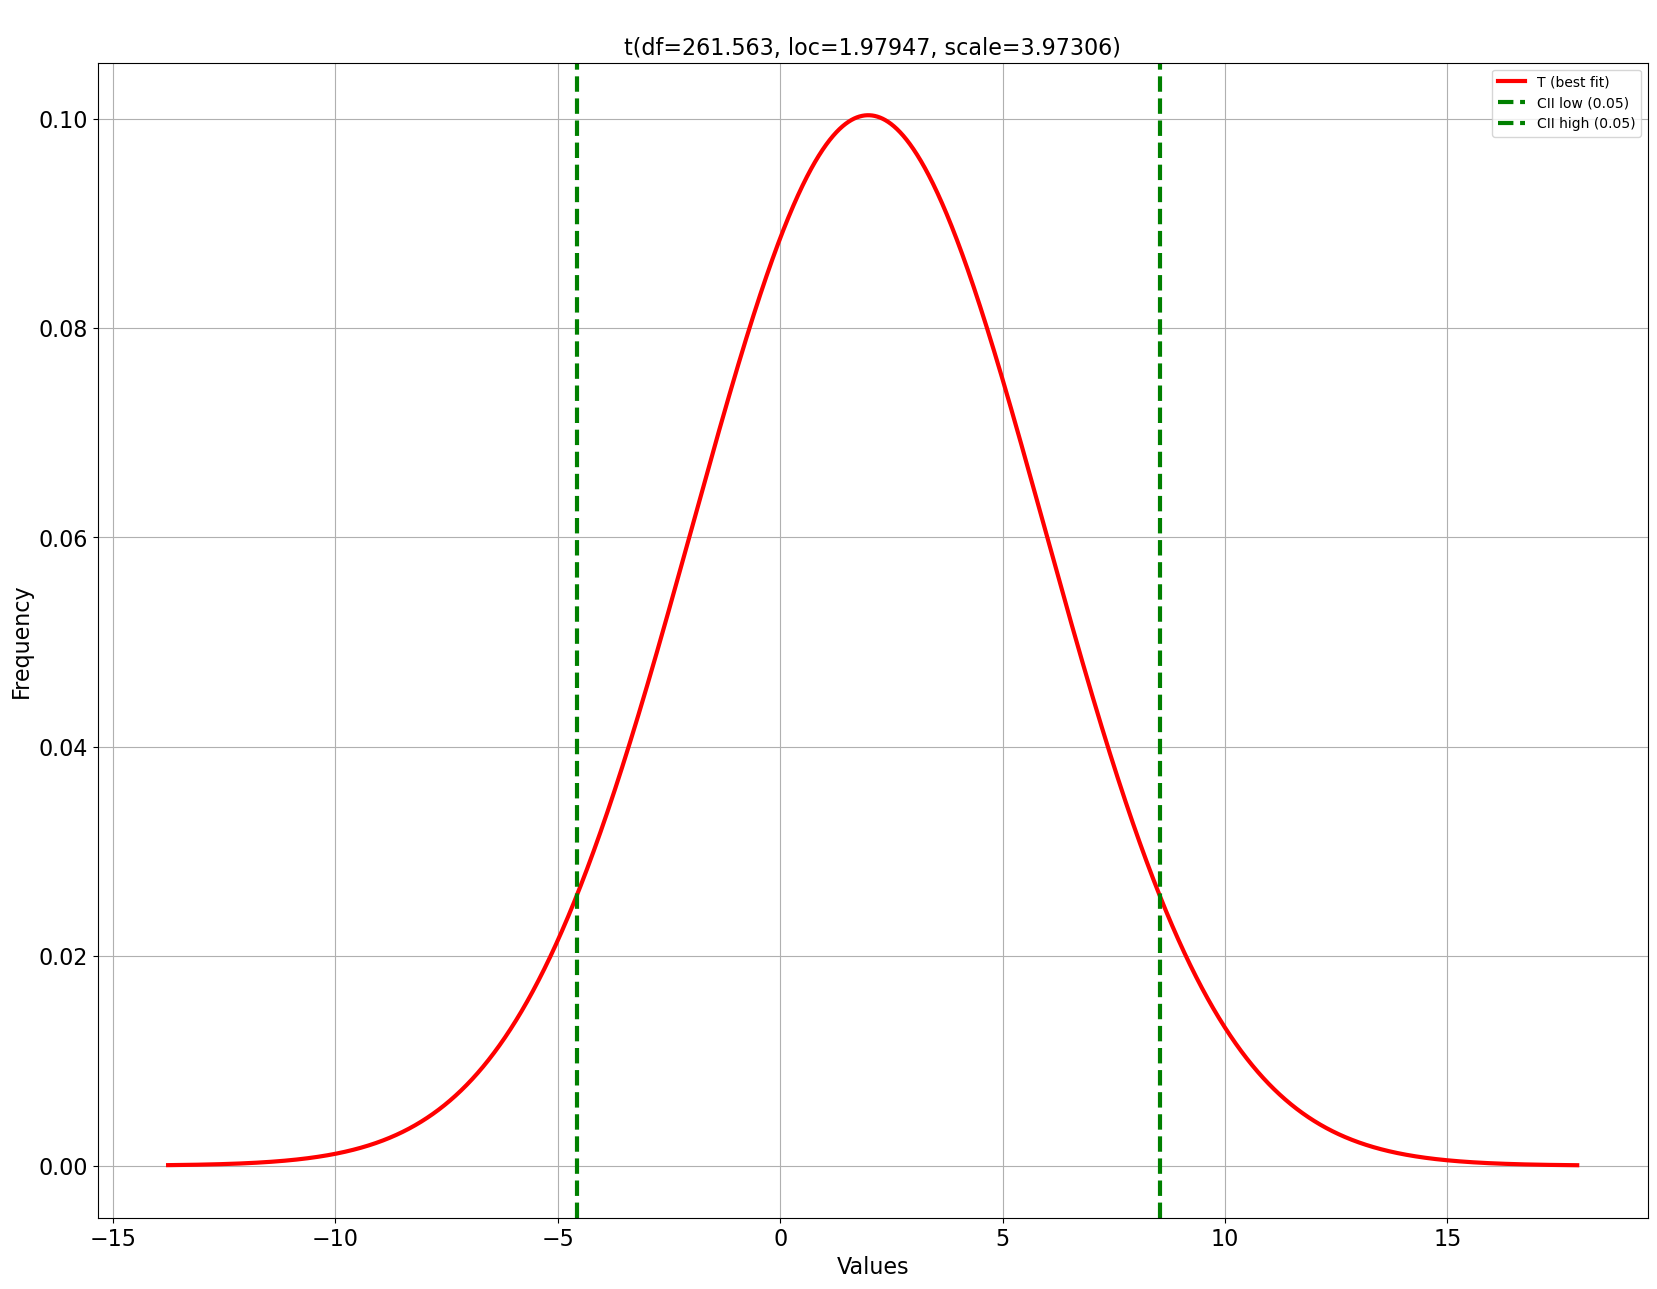

In [14]:
# Create subplot
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', ax=ax[0])
# Plot the CDF
dfit.plot(chart='CDF', ax=ax[1])

# Change or remove properties of the chart.
dfit.plot(chart='PDF', 
          emp_properties=None,
          bar_properties=None,
          pdf_properties={'color': 'r'},
          cii_properties={'color': 'g'})

We can also plot all other estimated theoretical distributions with the `n_top` parameter. A visual inspection confirms that the top 8 distributions have a very close fit with the empirical data with few exceptions. *Note that the bootstrap approach revealed that not all fits were stable.* The distributions in the legend of the plot are ranked from best fit (highest) to worst fit (lowest). Here we can see that the `dweibull` distribution has a very poor fit with two peaks in the middle. Using only the RSS score would have been difficult to judge whether or not to use this distribution. The distributions `uniform`, `exponent`, and `pareto` readily showed a poor RSS score and is now confirmed using the plot.

[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Estimated distribution: T(loc:1.979472, scale:3.973063)
[distfit] >INFO> Create CDF plot for the parametric method.
[distfit] >INFO> Ploting CDF


(None,
 <AxesSubplot:title={'center':'\nt(df=261.563, loc=1.97947, scale=3.97306)'}, xlabel='Values', ylabel='Frequency'>)

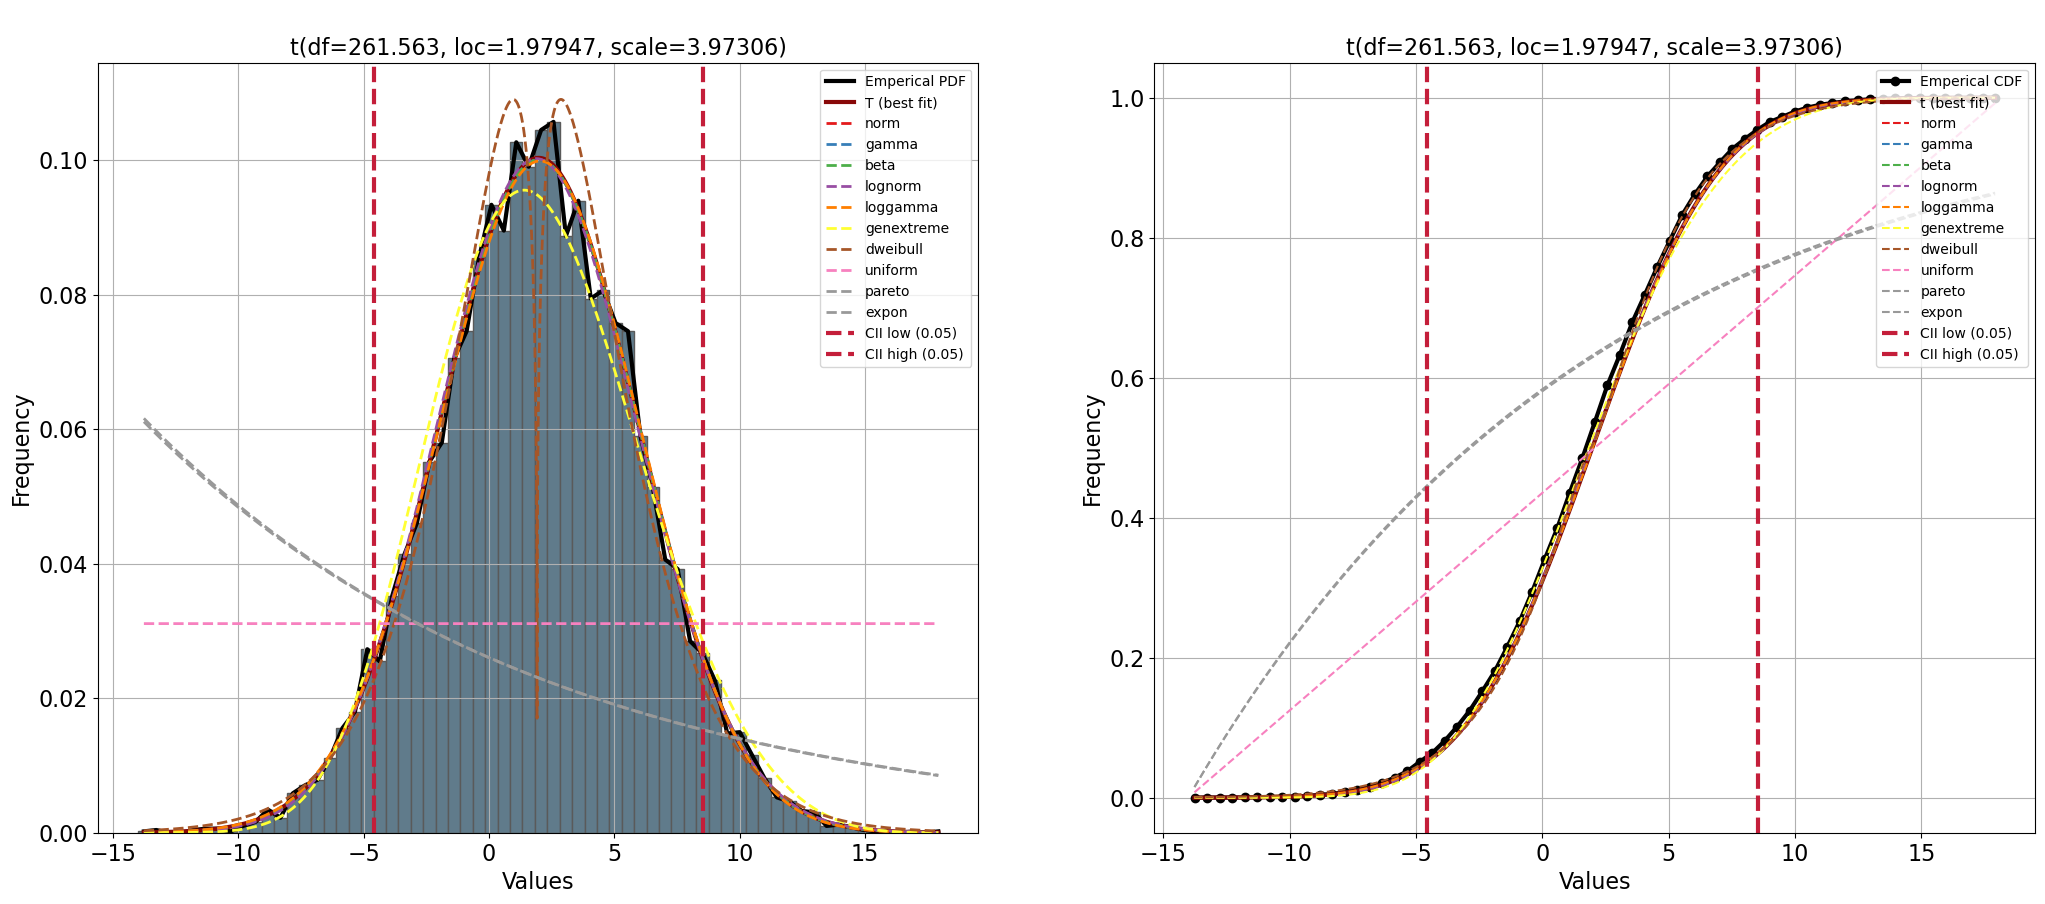

In [15]:
# Create subplot
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', n_top=11, ax=ax[0])
# Plot the CDF
dfit.plot(chart='CDF', n_top=11, ax=ax[1])

# Quantile-Quantile plot.

There is one more plot that we can inspect, which is the QQ plot. The QQ plot compares the empirical probability distributions vs. the theoretical probability distributions by plotting their quantiles against each other. If the two distributions are equal then the points on the QQ-plot will perfectly lie on a straight line `y = x`. We can make the QQ-plot using the `qqplot` function (Figure 5). The left panel shows the best fit, and the right panel includes all fitted theoretical distributions. More details on how to interpret the QQ plot can be found in this blog.

(None,
 <AxesSubplot:title={'center':'QQ-plot\nt(df=261.563, loc=1.97947, scale=3.97306)'}, xlabel='Theoretical Quantiles', ylabel='Sample Quantiles'>)

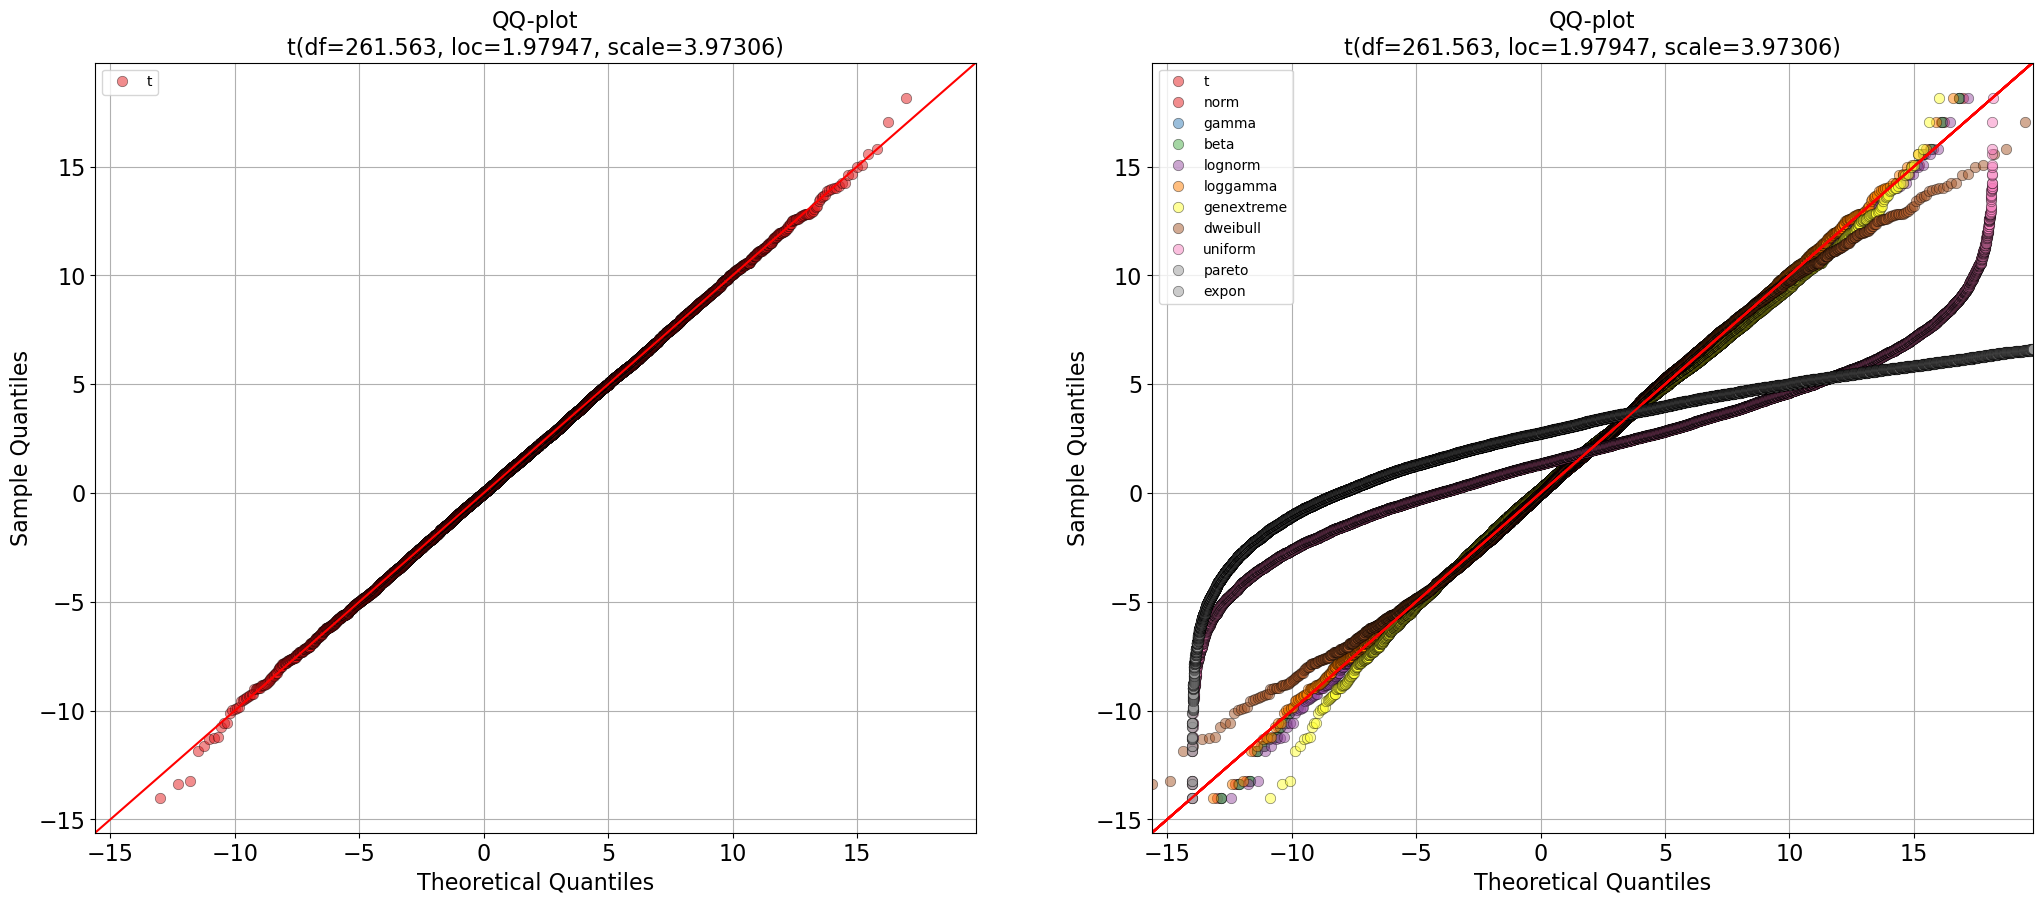

In [16]:
# Create subplot
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
# Plot left panel with best fitting distribution.
dfit.qqplot(X, ax=ax[0])
# plot right panel with all fitted theoretical distributions
dfit.qqplot(X, n_top=11, ax=ax[1])

# Identify the best distribution fit using non-parametric fitting

Non-parametric Density Estimation is when the population sample is *“distribution-free"* meaning that data do not resemble a common theoretical distribution. In **distfit**, two non-parametric methods are implemented for non-parametric density fitting: the **quantile** and **percentile** methods. Both methods assume that the data does not follow a specific probability distribution. In the case of the *quantile method*, the quantiles of the data are modeled which can be useful for data with skewed distributions. In the case of the *percentile method*, the percentiles are modeled which can be useful when data contains multiple peaks. In both methods, the advantage is that it is robust to outliers and does not make assumptions about the underlying distribution. In the code section below we initialize using the method `method='quantile'` or `method='percentile'`. All functionalities, such as predicting, and plotting can be used in the same manner as shown in the previous code sections.

In [17]:
# Initialize using the quantile or percentile approach.
dfit = distfit(method='quantile')

In [18]:
# Fit model on input data X and detect the best theoretical distribution.
dfit.fit_transform(X)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Compute confidence intervals [quantile]


{'model': {'CII_min_alpha': -4.6365826969028685,
  'CII_max_alpha': 8.57897573659353},
 'summary': None,
 'histdata': (array([0.00020204, 0.00040408, 0.        , 0.        , 0.00040408,
         0.00060611, 0.00060611, 0.00020204, 0.00101019, 0.0016163 ,
         0.00343464, 0.00222242, 0.00585909, 0.00707132, 0.00787947,
         0.01111208, 0.01555691, 0.01798136, 0.02727509, 0.02545675,
         0.03515457, 0.04141774, 0.0460646 , 0.0551563 , 0.05798483,
         0.07051117, 0.07455192, 0.08546196, 0.09334143, 0.08950272,
         0.10263517, 0.09899849, 0.10445351, 0.10566574, 0.08869457,
         0.09394755, 0.07940083, 0.08061306, 0.07576415, 0.07455192,
         0.05899502, 0.05131758, 0.04060958, 0.03919532, 0.02848732,
         0.02666898, 0.02262823, 0.01474875, 0.01495079, 0.01151615,
         0.00808151, 0.00525298, 0.00464687, 0.0032326 , 0.00303057,
         0.00101019, 0.00121223, 0.00080815, 0.00040408, 0.00020204,
         0.00020204, 0.        , 0.00020204, 0.        

[distfit] >INFO> Create PDF plot for the quantile method.


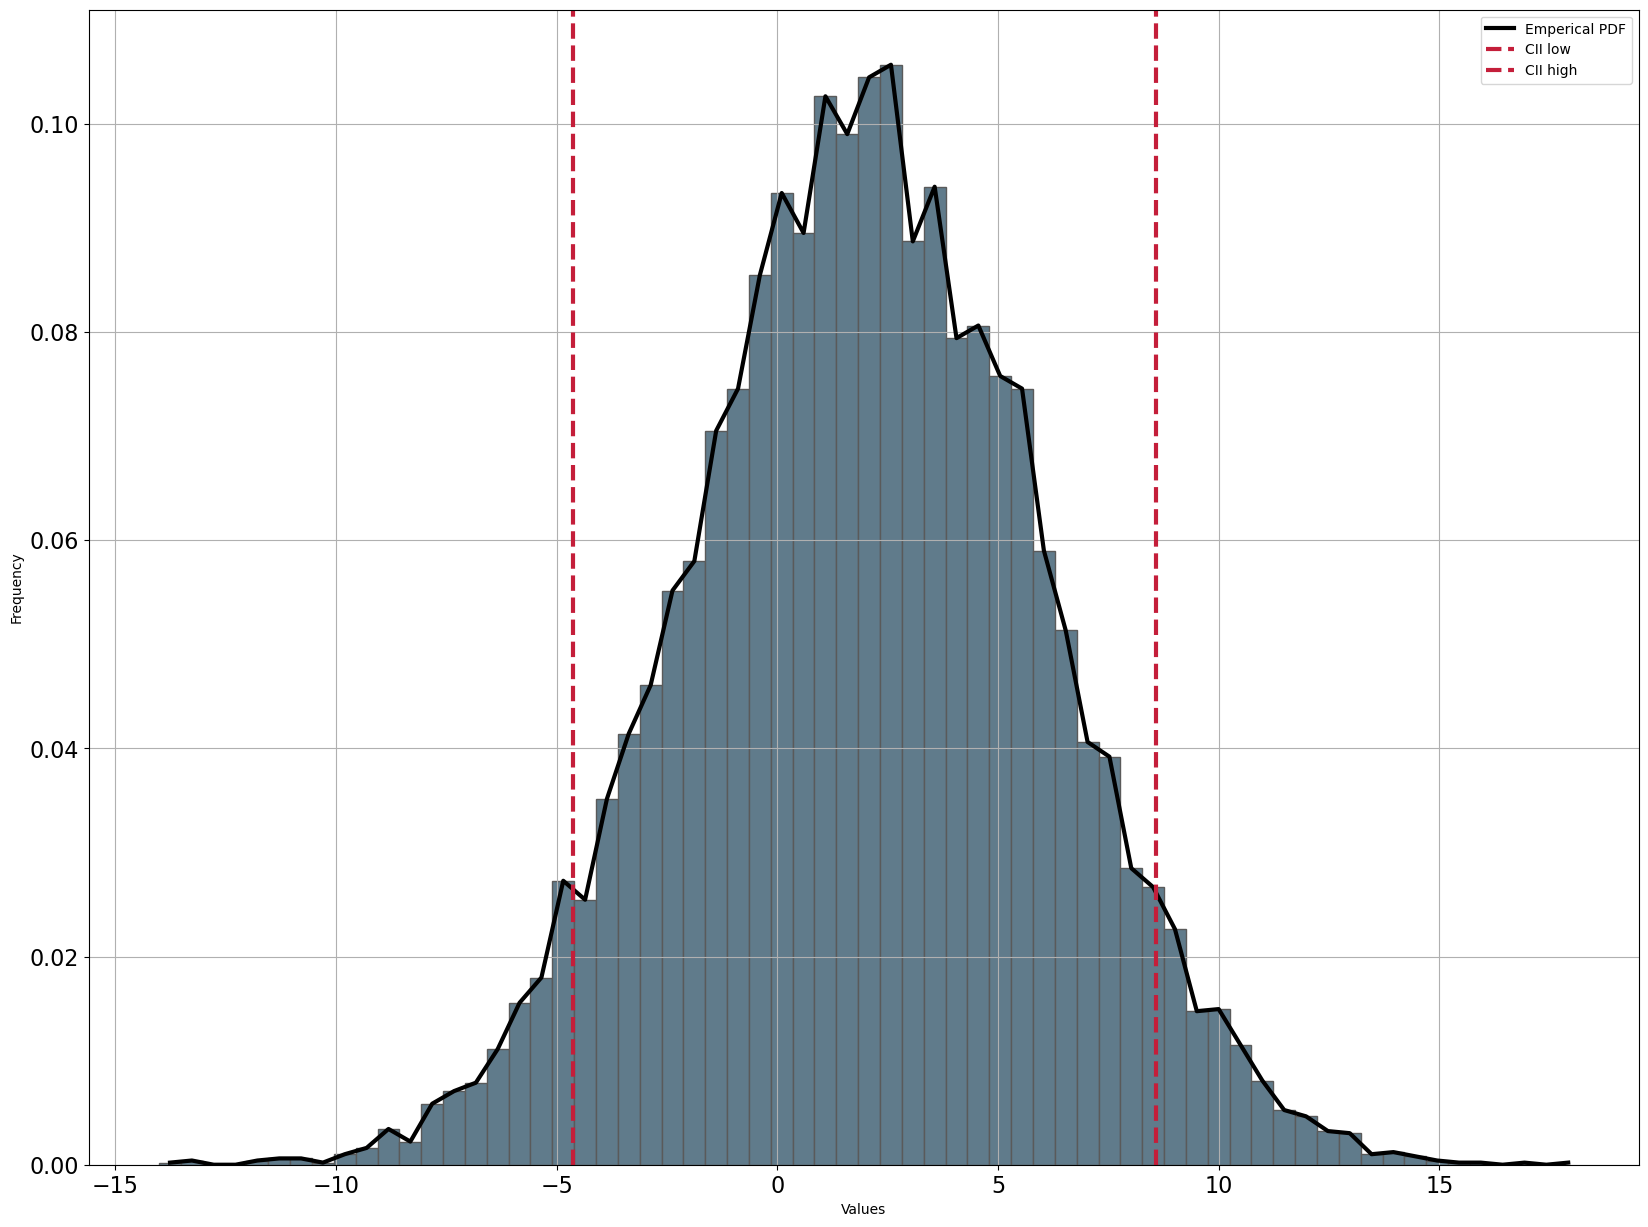

In [19]:
# Plot the results
fig, ax = dfit.plot()

In [20]:
# Initialize using the quantile or percentile approach.
dfit = distfit(method='percentile')

In [21]:
# Fit model on input data X and detect the best theoretical distribution.
dfit.fit_transform(X)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Compute confidence intervals [percentile]


{'model': {'CII_min_alpha': -5.802685443027897,
  'CII_max_alpha': 9.847473845190994},
 'summary': None,
 'histdata': (array([0.00020204, 0.00040408, 0.        , 0.        , 0.00040408,
         0.00060611, 0.00060611, 0.00020204, 0.00101019, 0.0016163 ,
         0.00343464, 0.00222242, 0.00585909, 0.00707132, 0.00787947,
         0.01111208, 0.01555691, 0.01798136, 0.02727509, 0.02545675,
         0.03515457, 0.04141774, 0.0460646 , 0.0551563 , 0.05798483,
         0.07051117, 0.07455192, 0.08546196, 0.09334143, 0.08950272,
         0.10263517, 0.09899849, 0.10445351, 0.10566574, 0.08869457,
         0.09394755, 0.07940083, 0.08061306, 0.07576415, 0.07455192,
         0.05899502, 0.05131758, 0.04060958, 0.03919532, 0.02848732,
         0.02666898, 0.02262823, 0.01474875, 0.01495079, 0.01151615,
         0.00808151, 0.00525298, 0.00464687, 0.0032326 , 0.00303057,
         0.00101019, 0.00121223, 0.00080815, 0.00040408, 0.00020204,
         0.00020204, 0.        , 0.00020204, 0.        

[distfit] >INFO> Create PDF plot for the percentile method.


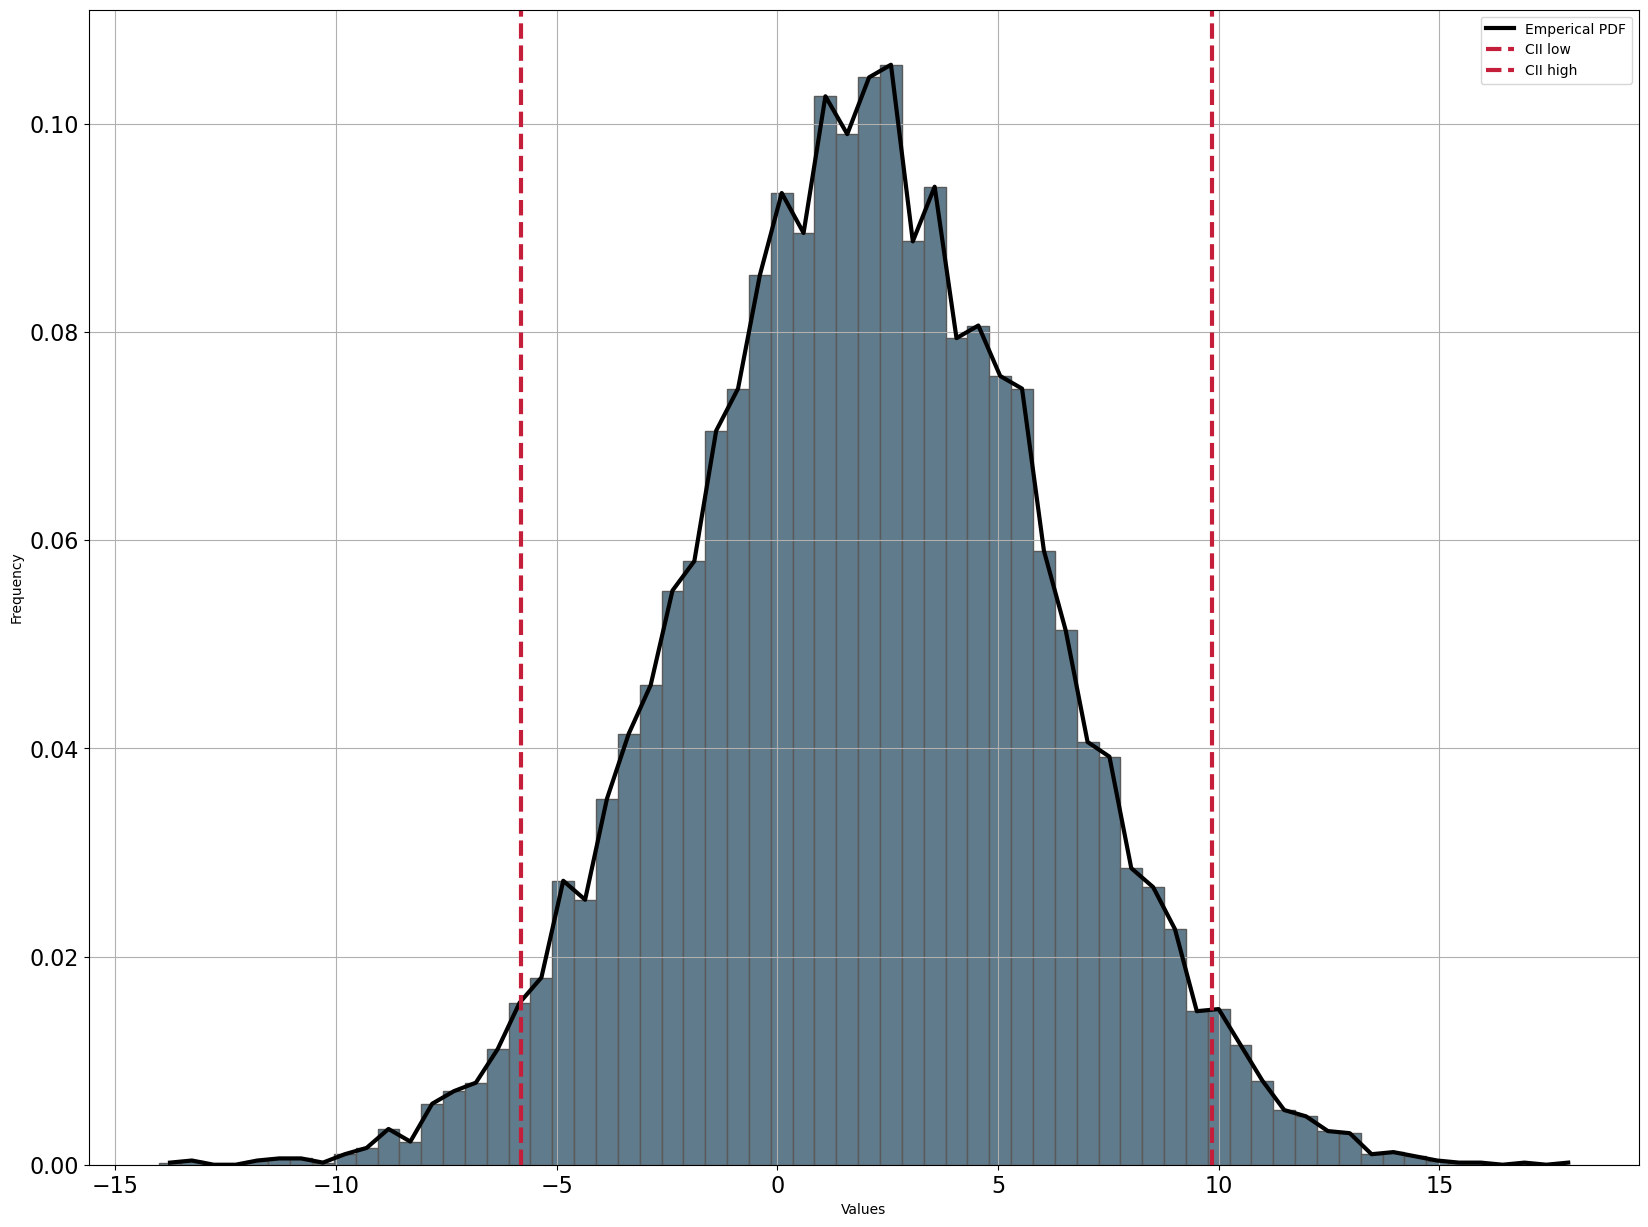

In [22]:
# Plot the results
fig, ax = dfit.plot()

# Identify the best distribution for discrete data

In case the random variables are discrete, the **distift** library contains the option for **discrete fitting**. The best fit is derived using the binomial distribution. The questions can be summarized as follows: given a list of nonnegative integers, can we fit a probability distribution for a discrete distribution, and compare the quality of the fit? For discrete quantities, the correct term is Probability Mass Function (PMF). As far as discrete distributions go, the PMF for one list of integers is of the form P(k) and can only be fitted to the binomial distribution, with suitable values for `n` and `p`, and this method is implemented in distfit. See the code section below where a discrete dataset is created with `n=8` and `p=0.5`. The random variables are given as input to distfit which detected the parameters `n=8` and `p=0.501366`, indicating a very good fit.

In [23]:
# Load library
from scipy.stats import binom
from distfit import distfit

In [24]:
# Parameters for the test-case:
n = 8
p = 0.5
# Generate 10000 randon discrete data points of the distribution of (n, p)
X = binom(n, p).rvs(10000)

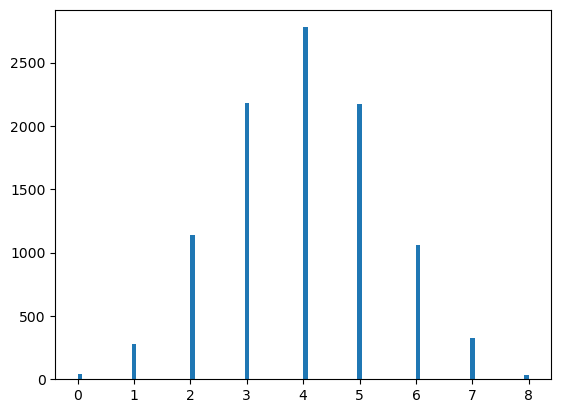

In [25]:
plt.figure()
plt.hist(X, bins=100)
plt.show();

In [26]:
# Initialize using the discrete approach.
dfit = distfit(method='discrete')

In [27]:
# Find the best fit.
dfit.fit_transform(X)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> Fit using binomial distribution.
[distfit] >INFO> [distfit] >[binomial] [RSS=6.9e-05] [n=8] [p=0.499614] [chi^2=9.86e-06]
[distfit] >INFO> Compute confidence intervals [discrete]


{'model': {'name': 'binom',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x244a1a622c8>,
  'params': (8, 0.49961369688467067),
  'score': 6.904878186051383e-05,
  'chi2r': 9.864111694359119e-06,
  'n': 8,
  'p': 0.49961369688467067,
  'CII_min_alpha': 2.0,
  'CII_max_alpha': 6.0},
 'summary':     name     score  loc     scale   arg                    params  \
 0  binom  0.000069    8  0.499614  None  (8, 0.49961369688467067)   
 
                                                model  
 0  <scipy.stats._distn_infrastructure.rv_frozen o...  ,
 'histdata': (array([0.0209 , 0.     , 0.     , 0.     , 0.     , 0.1518 , 0.     ,
         0.     , 0.     , 0.     , 0.     , 0.62755, 0.     , 0.     ,
         0.     , 0.     , 1.2001 , 0.     , 0.     , 0.     , 0.     ,
         0.     , 1.5279 , 0.     , 0.     , 0.     , 0.     , 1.19295,
         0.     , 0.     , 0.     , 0.     , 0.     , 0.5808 , 0.     ,
         0.     , 0.     , 0.     , 0.17765, 0.     , 0.     , 0. 

In [28]:
# print results
print(dfit.model)

{'name': 'binom', 'model': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000244A1A622C8>, 'params': (8, 0.49961369688467067), 'score': 6.904878186051383e-05, 'chi2r': 9.864111694359119e-06, 'n': 8, 'p': 0.49961369688467067, 'CII_min_alpha': 2.0, 'CII_max_alpha': 6.0}


In [29]:
# Make predictions
results = dfit.predict([0, 2, 8])

[distfit] >INFO> Compute significance for 3 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].


In [30]:
results

{'y': array([0, 2, 8]),
 'y_proba': array([0.00589569, 0.14503886, 0.        ]),
 'y_pred': array(['down', 'down', 'up'], dtype='<U4'),
 'P': array([0.00393046, 0.14503886, 0.        ]),
 'y_bool': array([ True, False,  True])}

[distfit] >INFO> Create PDF plot for the discrete method.


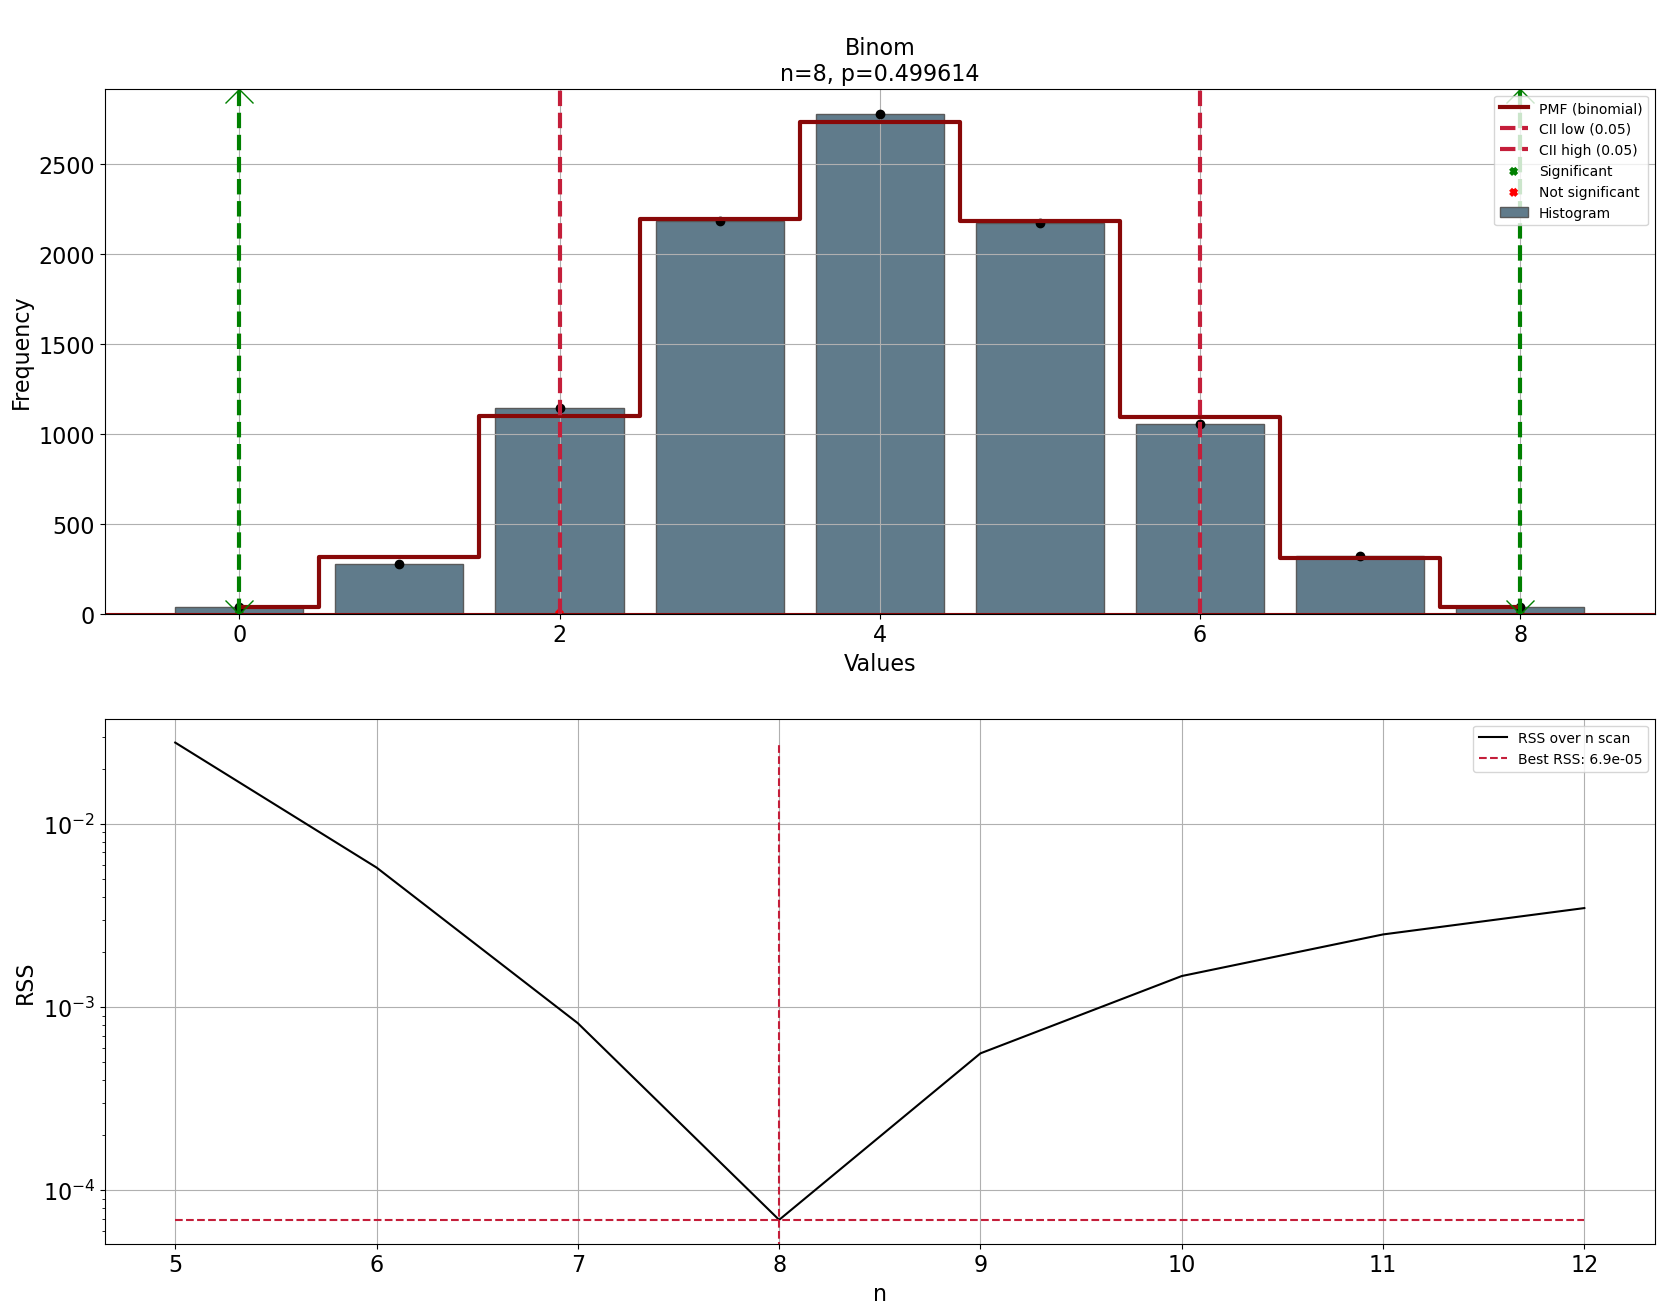

In [31]:
# Plot the results
dfit.plot();

[distfit] >INFO> Create PDF plot for the discrete method.


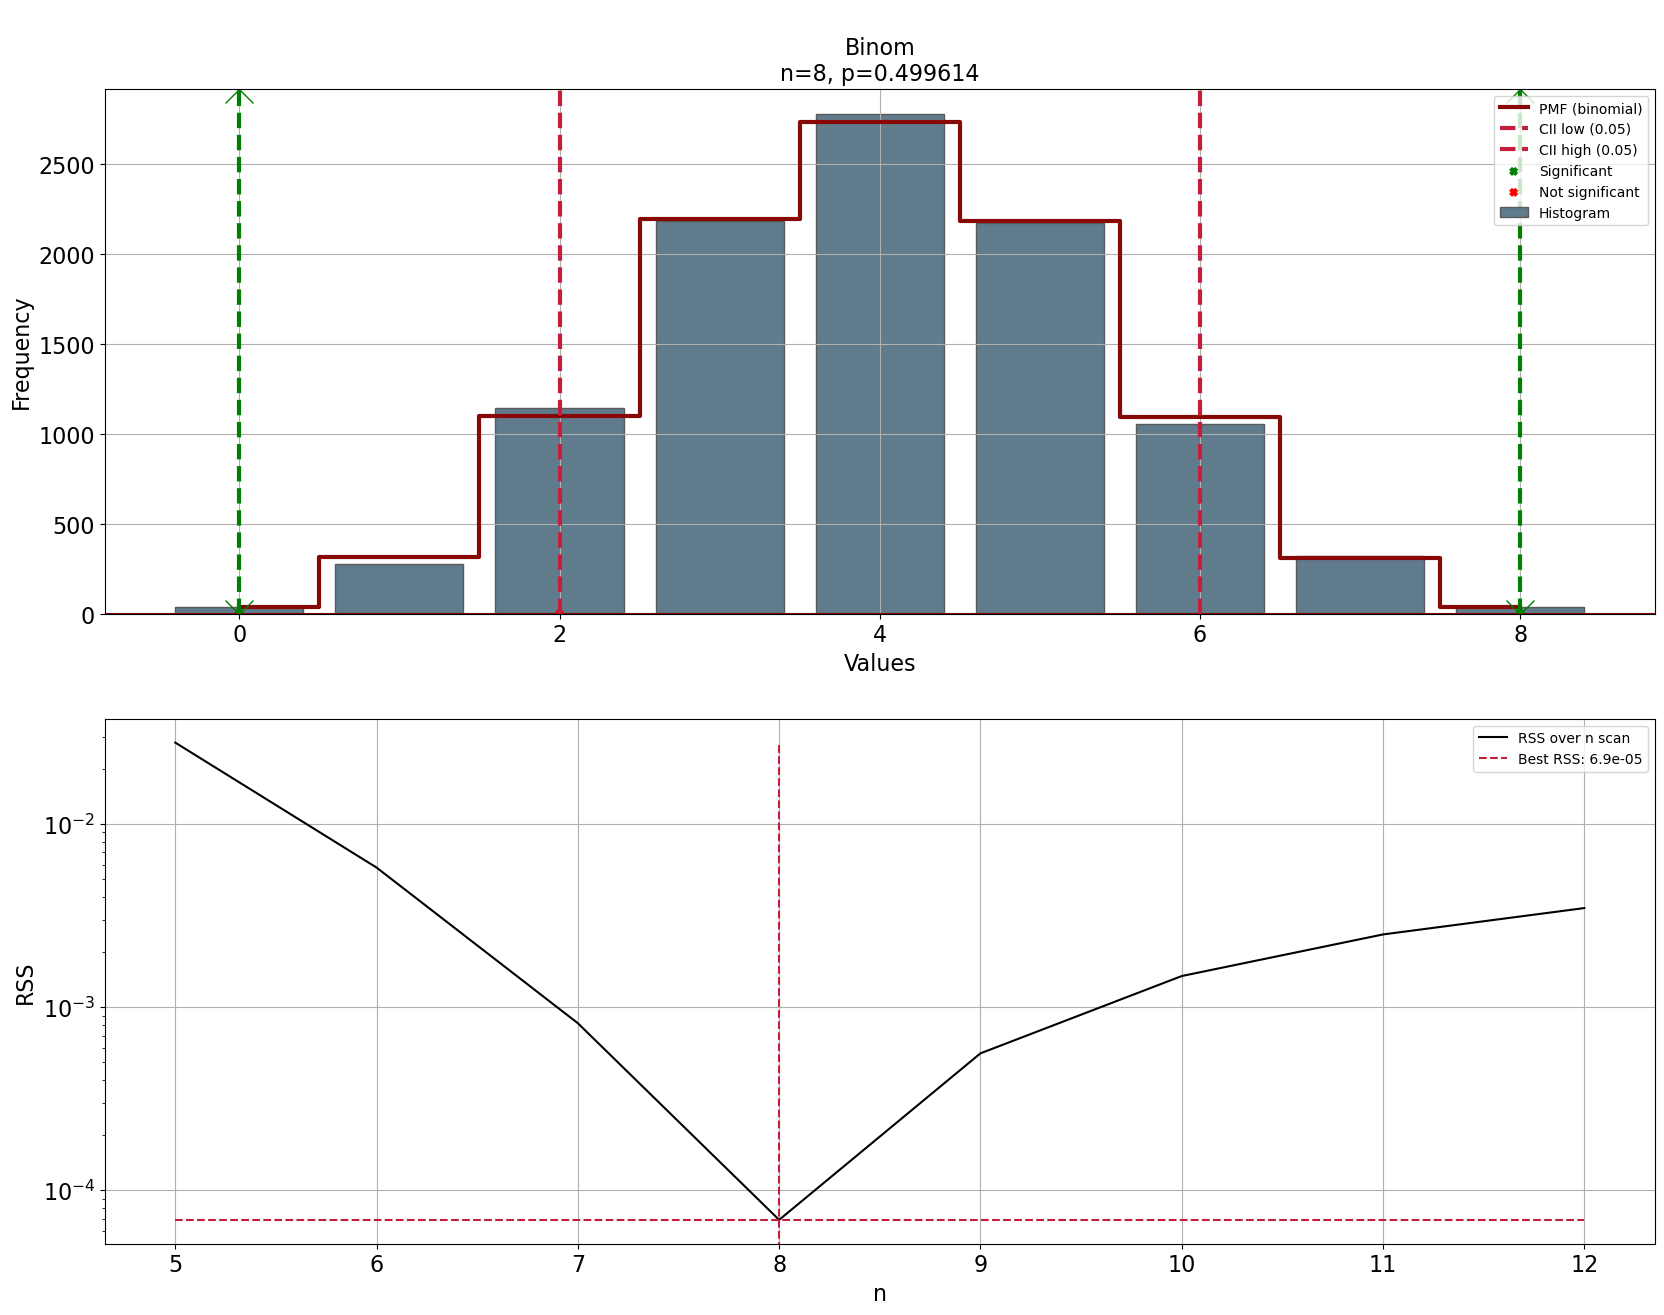

In [32]:
# Change colors or remove parts of the figure.
# Remove emperical distribution
dfit.plot(emp_properties=None);

[distfit] >INFO> Create PDF plot for the discrete method.


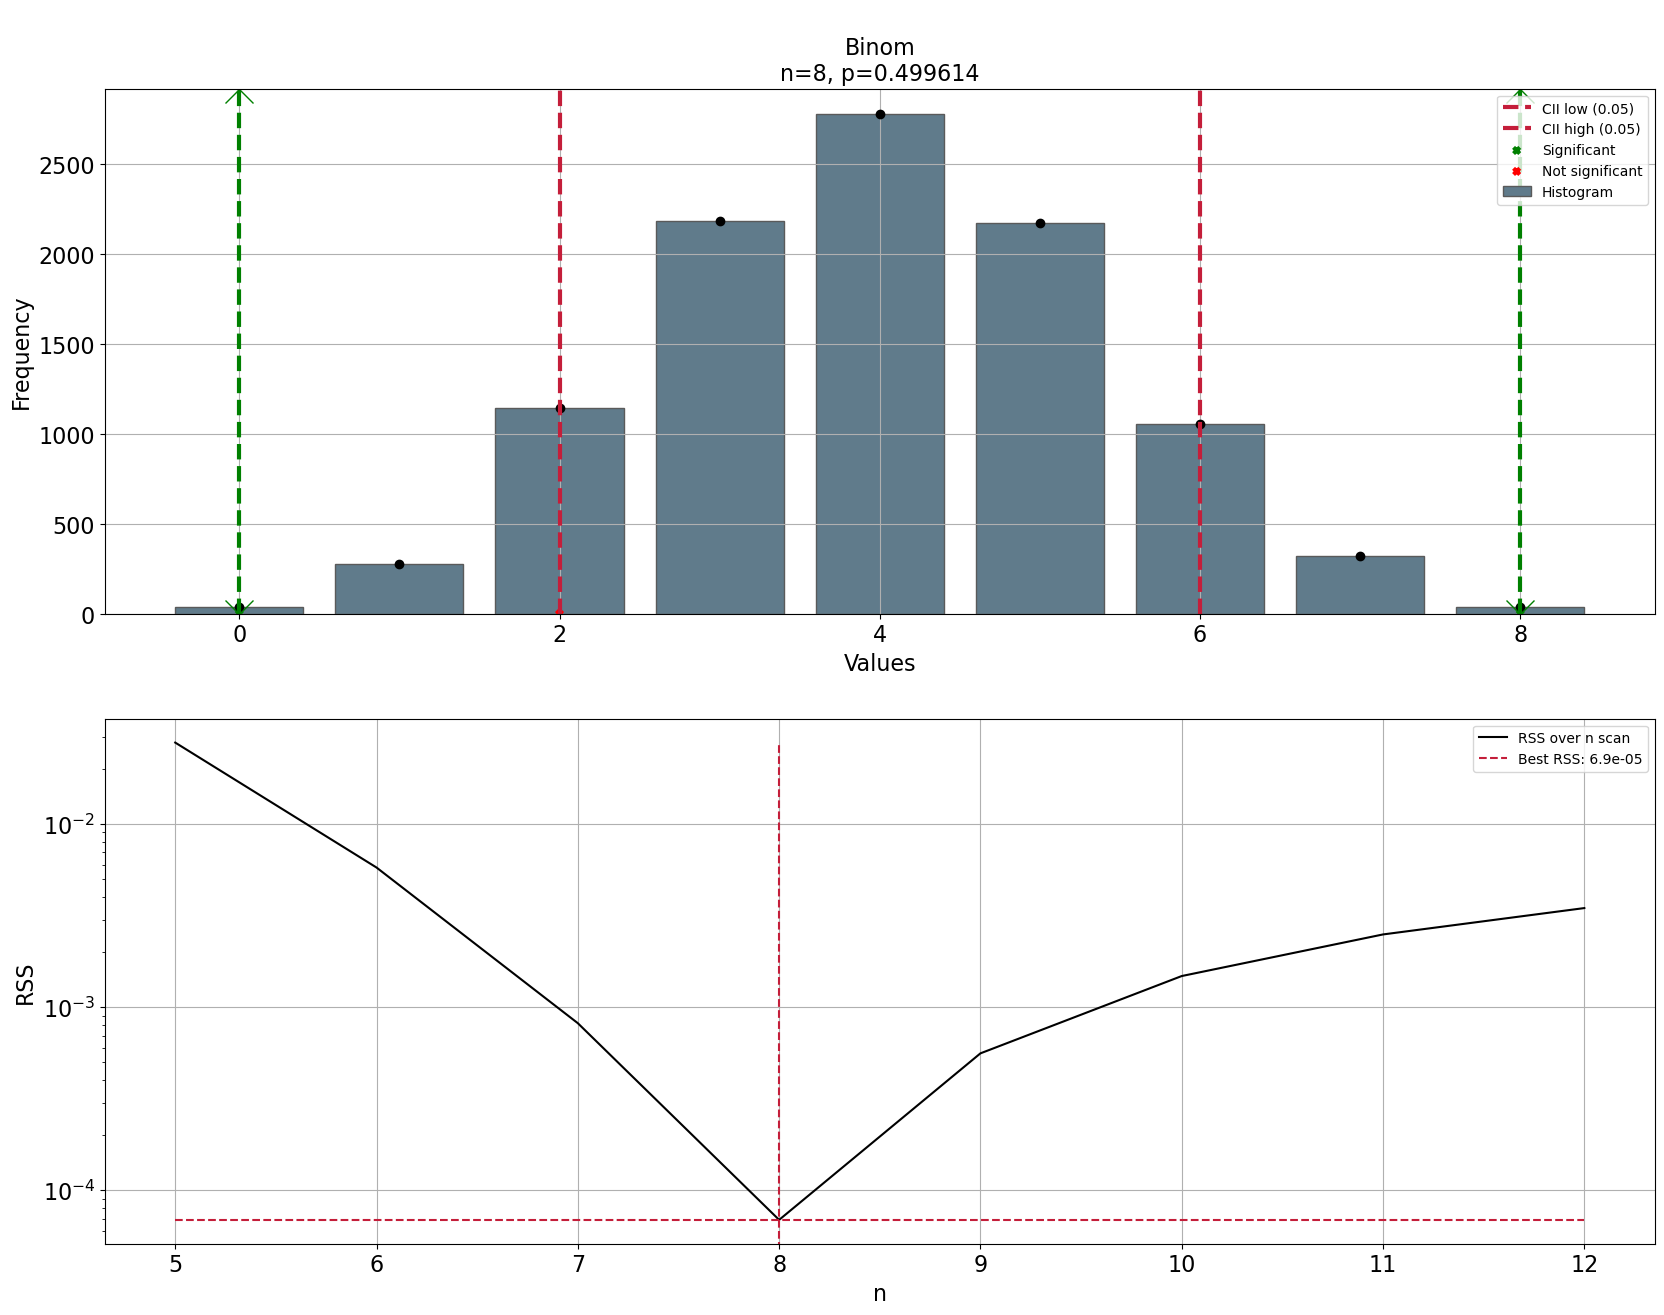

In [33]:
# Remove PDF
dfit.plot(pdf_properties=None);

[distfit] >INFO> Create PDF plot for the discrete method.


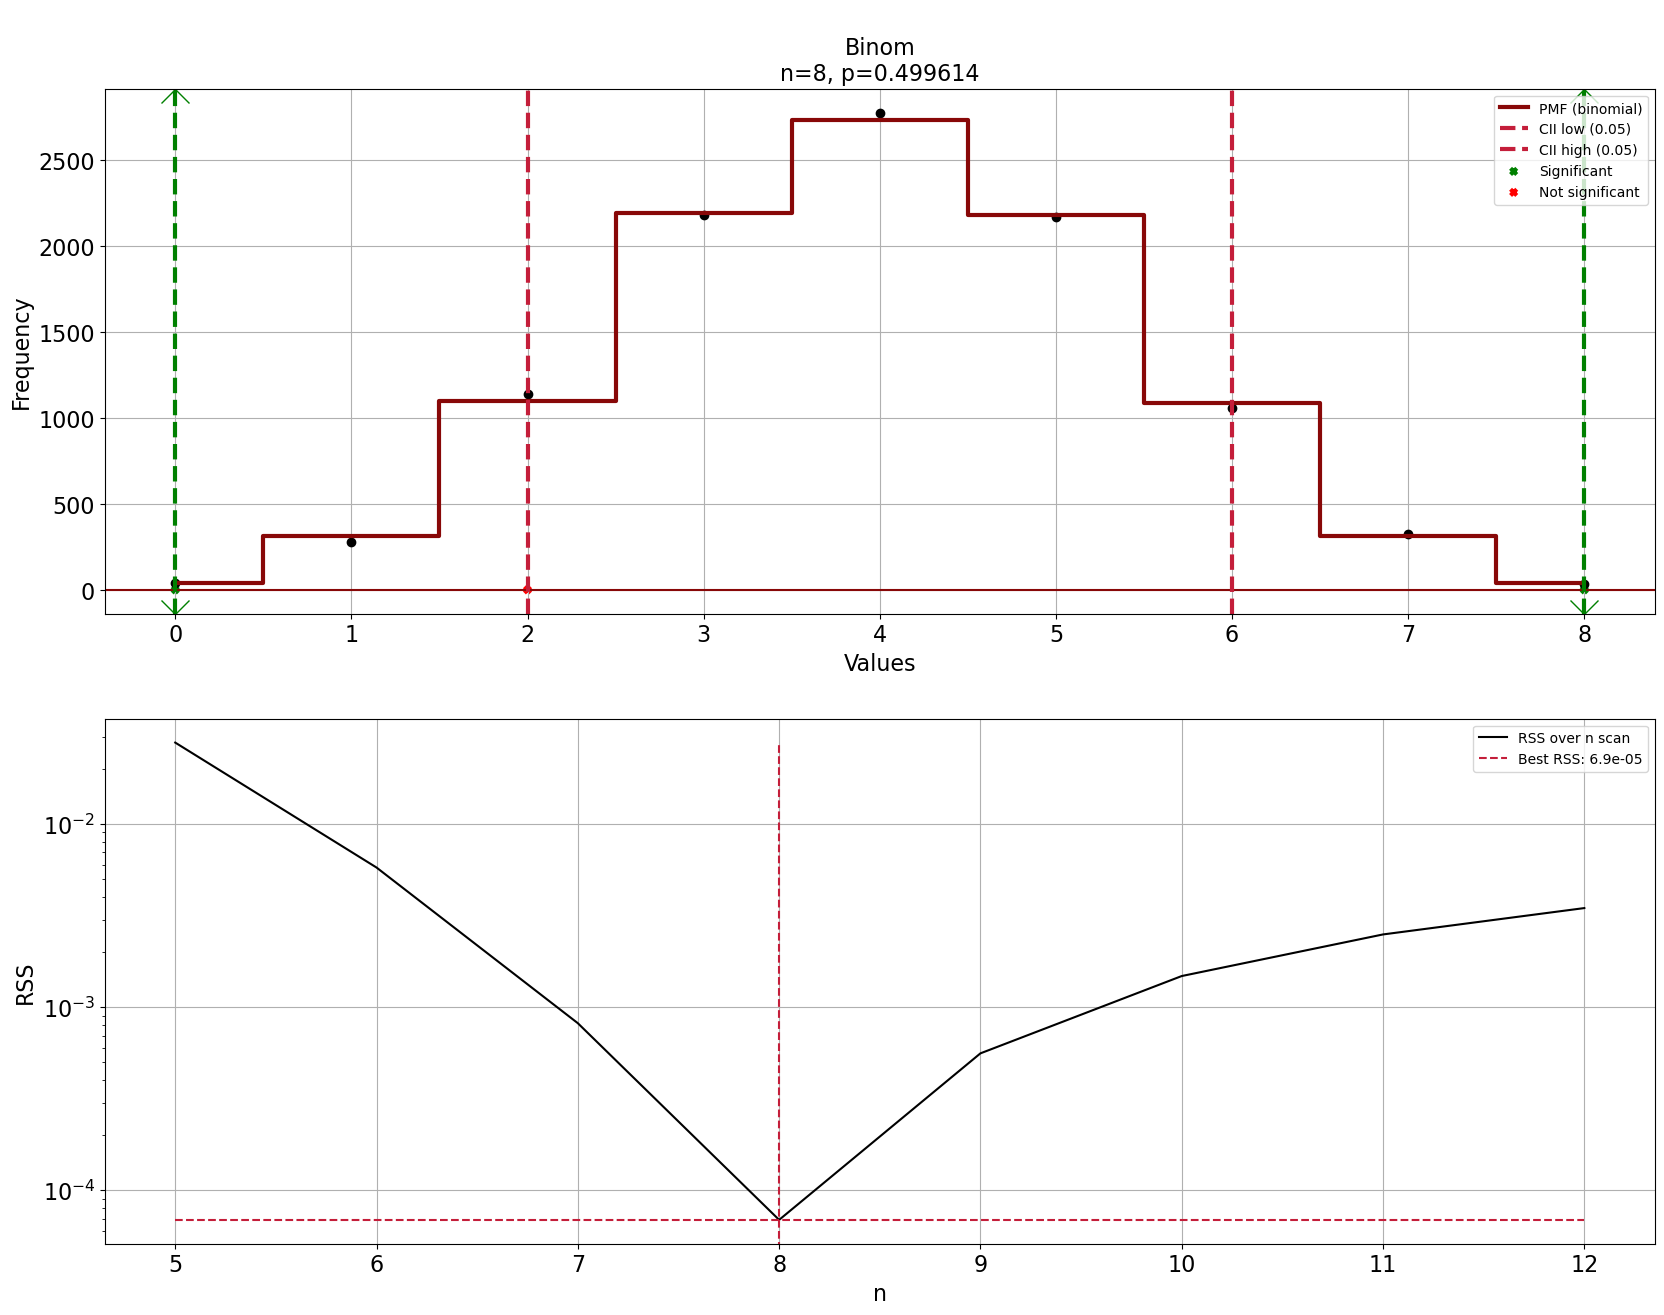

In [34]:
# Remove histograms
dfit.plot(bar_properties=None);

[distfit] >INFO> Create PDF plot for the discrete method.


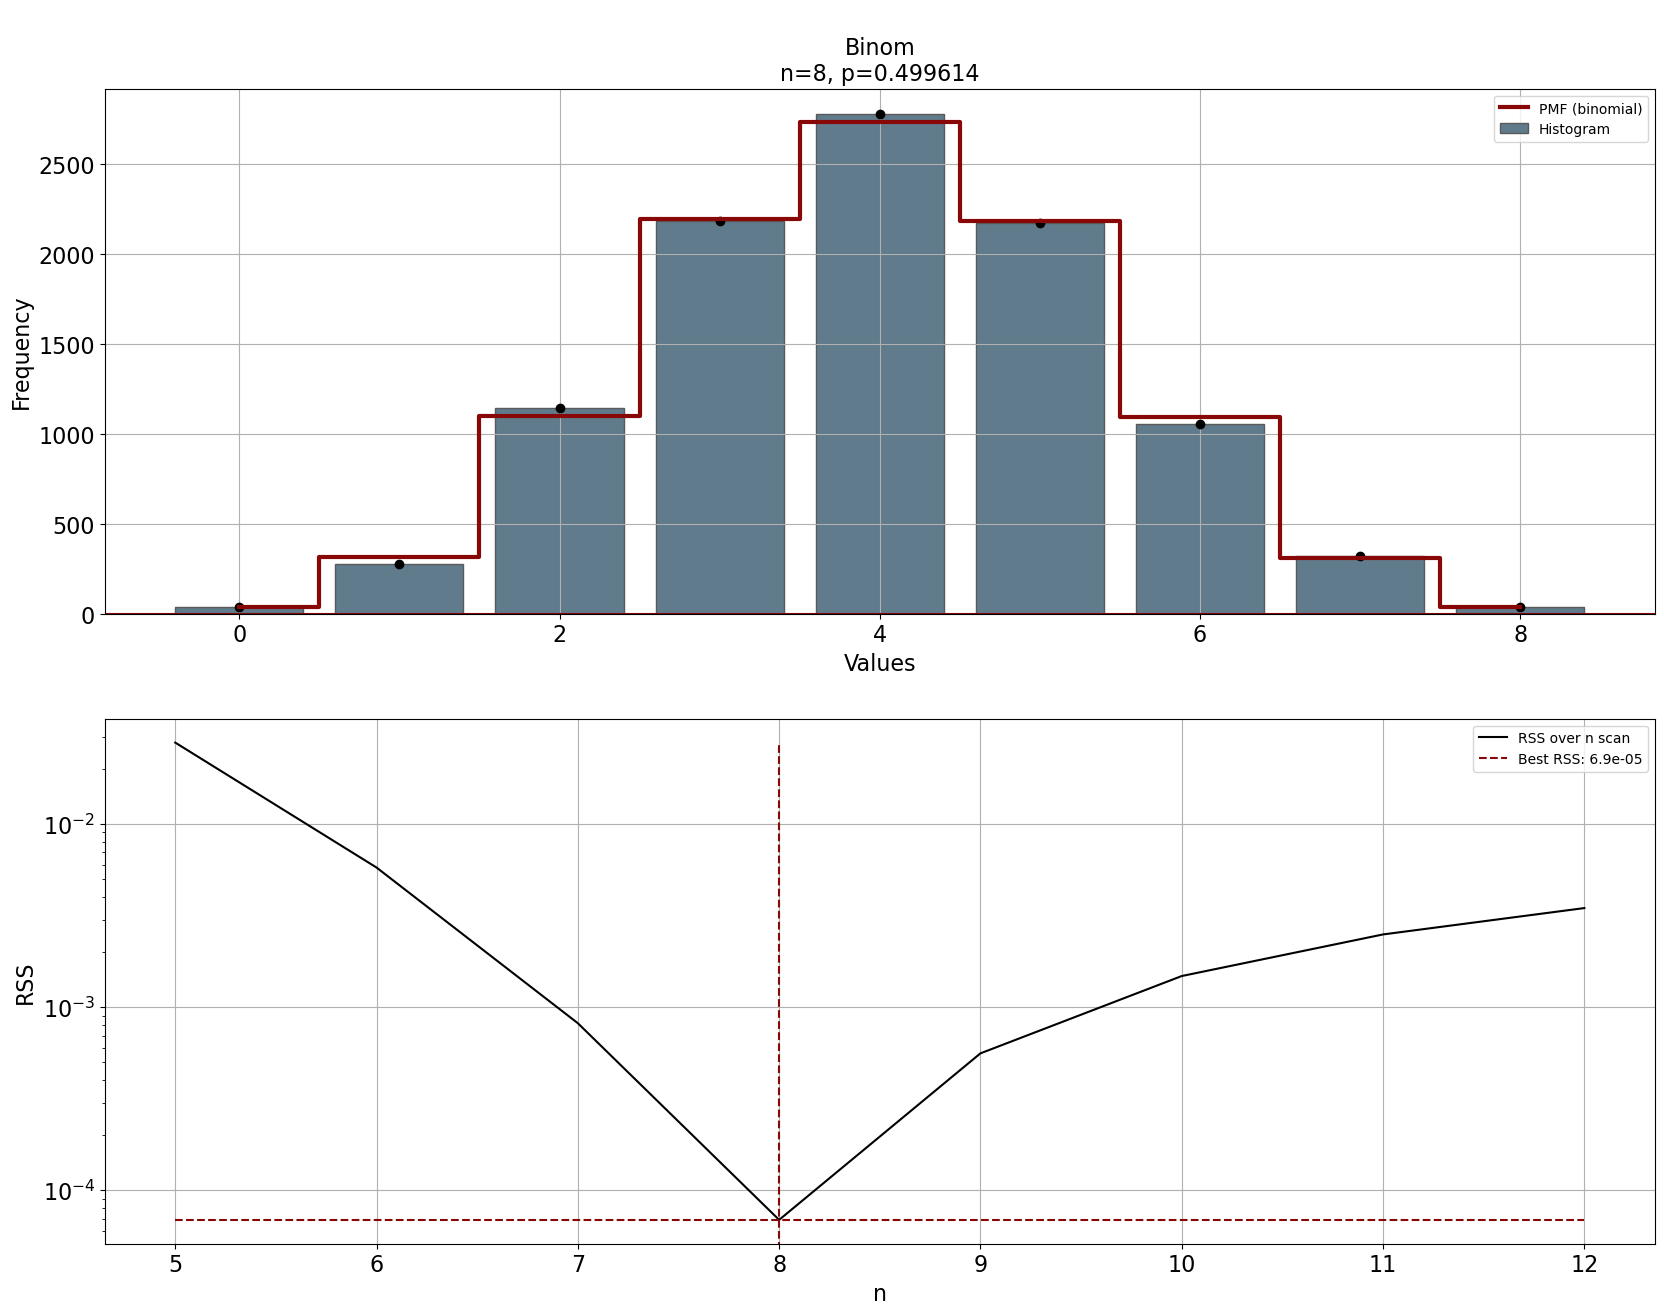

In [35]:
#Remove confidence intervals
dfit.plot(cii_properties=None);

# Applications of distribution fitting

Knowing the underlying distribution in your data set is key in many applications. I will summarize a few.

- **Anomaly/novelty detection** is a clear application of density estimation. This can be achieved by calculating the confidence intervals given the distribution and parameters. The distfit library computes the confidence intervals, together with the probability of a sample being an outlier/novelty given the fitted distribution. A small example is shown in the code section below but follow the link for a deep dive.

In [36]:
# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

In [37]:
# Initialize using the parametric approach (default).
dfit = distfit(multtest='fdr_bh', alpha=0.05)

[distfit] >WARNING> multtest will be removed from initialization in a future release. Please set this parameter when using the predict function. Example: dfit.predict(multtest="holm")


In [38]:
# Fit model on input data X.
dfit.fit_transform(X)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000367854] [loc=2.064 scale=3.975]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.110048] [loc=-14.203 scale=16.267]
[distfit] >INFO> [pareto    ] [0.29 sec] [RSS: 0.116018] [loc=-3595131255.818 scale=3595131241.616]
[distfit] >INFO> [dweibull  ] [0.06 sec] [RSS: 0.00245765] [loc=1.961 scale=3.413]
[distfit] >INFO> [t         ] [0.13 sec] [RSS: 0.00036787] [loc=2.064 scale=3.975]
[distfit] >INFO> [genextreme] [0.20 sec] [RSS: 0.000697194] [loc=0.586 scale=3.957]
[distfit] >INFO> [gamma     ] [0.04 sec] [RSS: 0.000366823] [loc=-980.272 scale=0.016]
[distfit] >INFO> [lognorm   ] [0.27 sec] [RSS: 0.000370426] [loc=-353.653 scale=355.694]
[distfit] >INFO> [beta      ] [0.26 sec] [RSS: 0.000365338] [loc=-90.498 scale=194.566]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0765528] [loc=-14.203 scale=30.142]
[distfit] >INFO> [loggamma  ] [0.11 sec] [RSS: 0.000379201] [loc=-832.014 scale=121.8

{'model': {'name': 'beta',
  'score': 0.0003653382908905046,
  'loc': -90.49840661410396,
  'scale': 194.56554100260698,
  'arg': (283.7764484841731, 312.7177148949046),
  'params': (283.7764484841731,
   312.7177148949046,
   -90.49840661410396,
   194.56554100260698),
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x244a2ade6c8>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': -4.466070446790567,
  'CII_max_alpha': 8.612694667314784},
 'summary':           name     score                loc              scale  \
 0         beta  0.000365         -90.498407         194.565541   
 1        gamma  0.000367         -980.27235           0.016086   
 2         norm  0.000368           2.064308           3.975185   
 3            t  0.000368           2.064307           3.975116   
 4      lognorm   0.00037        -353.652875         355.694164   
 5     loggamma  0.000379        -832.014237         121.891468   
 6   genextreme  0.00069

In [39]:
# With the fitted model we can make predictions on new unseen data.
y = [-8, -2, 1, 3, 5, 15]
dfit.predict(y, todf=True)

[distfit] >INFO> Compute significance for 6 samples.
[distfit] >INFO> Multiple test correction method applied: [fdr_bh].


{'y': array([-8, -2,  1,  3,  5, 15]),
 'y_proba': array([0.01649902, 0.30694902, 0.40658196, 0.40658196, 0.34522601,
        0.00344095]),
 'y_pred': array(['down', 'none', 'none', 'none', 'none', 'up'], dtype='<U4'),
 'P': array([0.00549967, 0.15347451, 0.39505107, 0.40658196, 0.23015068,
        0.00057349]),
 'y_bool': array([ True, False, False, False, False,  True]),
 'df':       y   y_proba y_pred         P
 0  -8.0  0.016499   down  0.005500
 1  -2.0  0.306949   none  0.153475
 2   1.0  0.406582   none  0.395051
 3   3.0  0.406582   none  0.406582
 4   5.0  0.345226   none  0.230151
 5  15.0  0.003441     up  0.000573}

In [40]:
# Print results
print(dfit.results['df'])

      y   y_proba y_pred         P
0  -8.0  0.016499   down  0.005500
1  -2.0  0.306949   none  0.153475
2   1.0  0.406582   none  0.395051
3   3.0  0.406582   none  0.406582
4   5.0  0.345226   none  0.230151
5  15.0  0.003441     up  0.000573


[distfit] >INFO> Create PDF plot for the parametric method.
[distfit] >INFO> Mark 2 significant regions
[distfit] >INFO> Estimated distribution: Beta(loc:-90.498407, scale:194.565541)


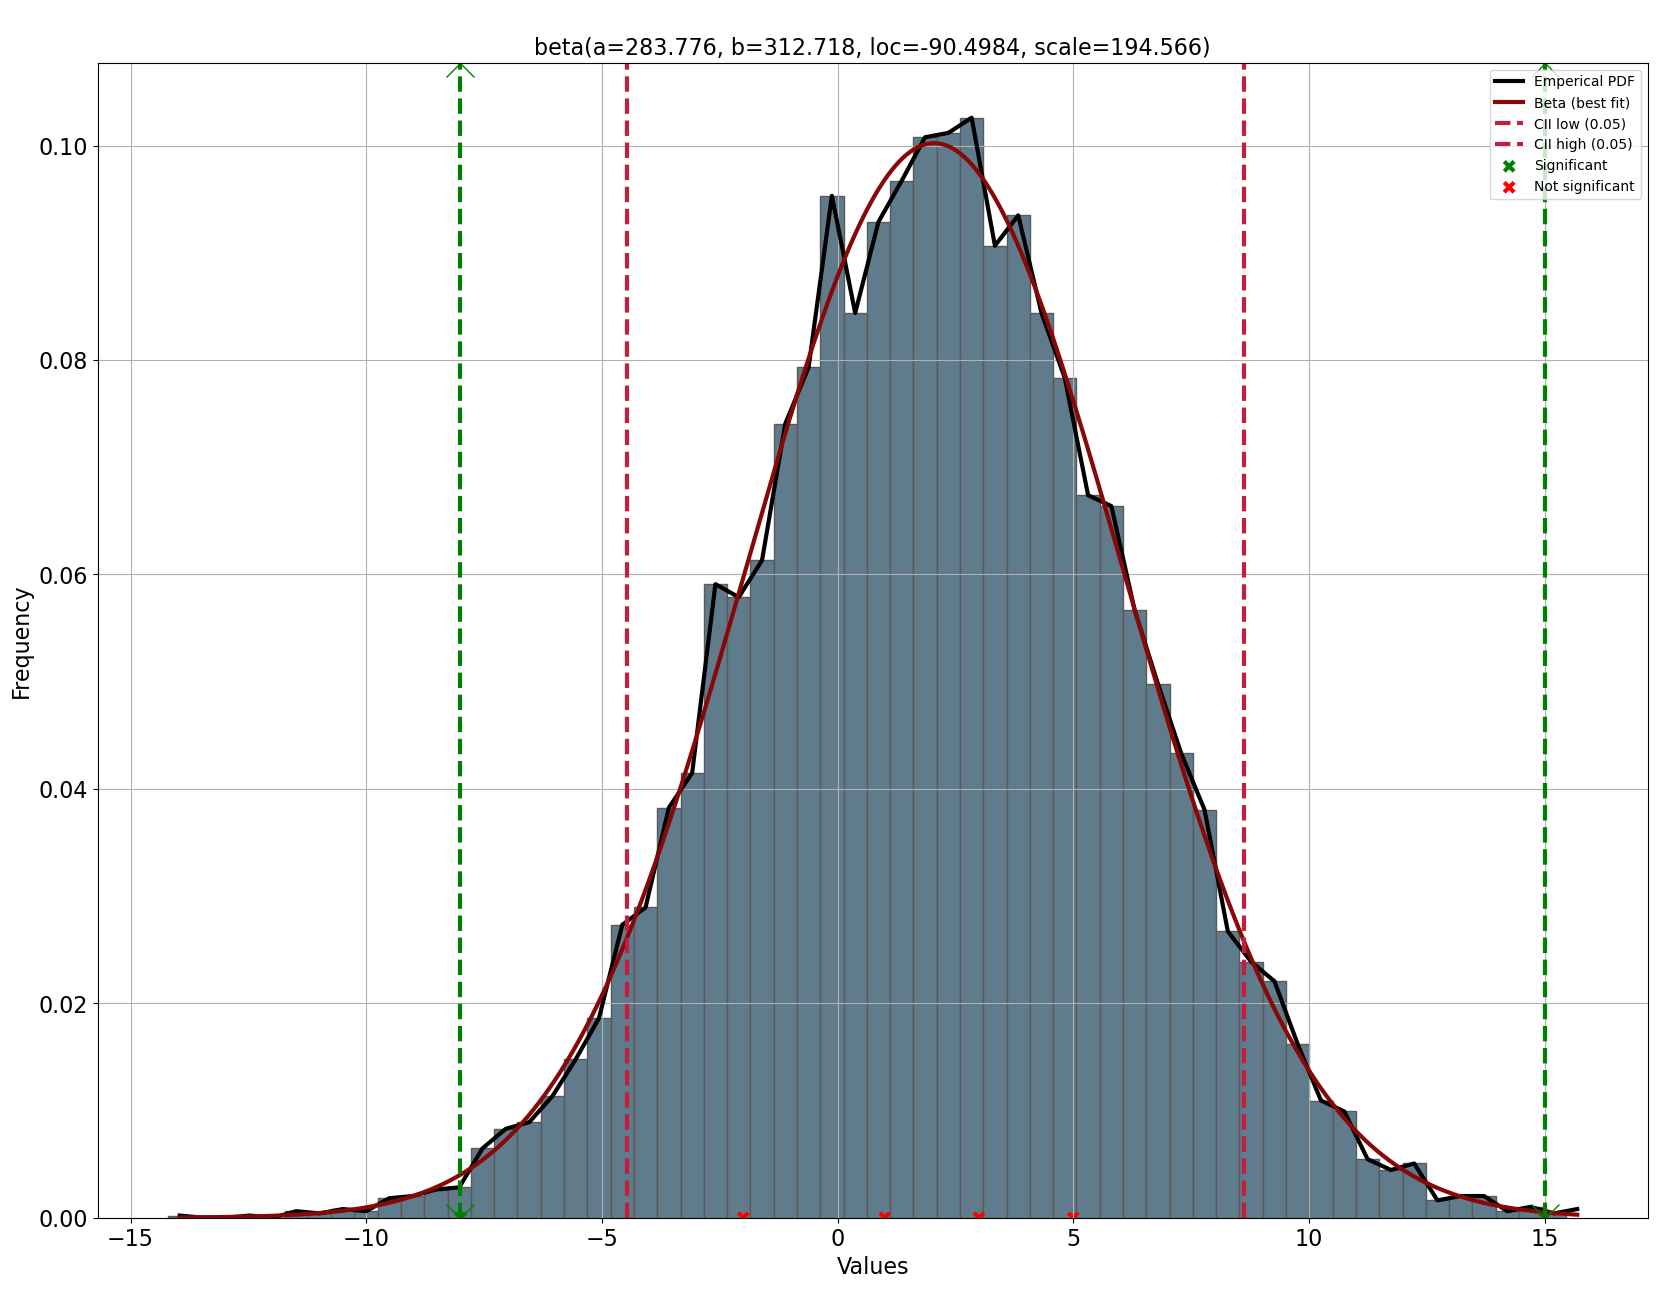

In [41]:
# Plot the results
dfit.plot();

- **Synthetic data generations:** Probability distribution fitting can be used to generate synthetic data that is similar to real-world data. By fitting a probability distribution to real-world data, it is possible to generate synthetic data that can be used to test hypotheses and evaluate the performance of algorithms. In the code section below we will first generate random variables from a normal distribution, estimate the distribution parameters, and we can then start creating synthetic data using the fitted distribution.

In [42]:
# Create random normal data with mean=2 and std=4
X = np.random.normal(2, 4, 10000)

In [43]:
# Initialize using the parametric approach (default).
dfit = distfit()

In [44]:
# Fit model on input data X.
dfit.fit_transform(X)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.000489578] [loc=1.945 scale=3.980]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.110557] [loc=-12.899 scale=14.844]
[distfit] >INFO> [pareto    ] [0.29 sec] [RSS: 0.102943] [loc=-237831478.522 scale=237831465.623]
[distfit] >INFO> [dweibull  ] [0.09 sec] [RSS: 0.00184753] [loc=1.879 scale=3.393]
[distfit] >INFO> [t         ] [0.09 sec] [RSS: 0.000480007] [loc=1.944 scale=3.950]
[distfit] >INFO> [genextreme] [0.17 sec] [RSS: 0.00103436] [loc=0.443 scale=3.947]
[distfit] >INFO> [gamma     ] [0.12 sec] [RSS: 0.000482871] [loc=-262.045 scale=0.060]
[distfit] >INFO> [lognorm   ] [0.29 sec] [RSS: 0.000491221] [loc=-187.276 scale=189.174]
[distfit] >INFO> [beta      ] [0.14 sec] [RSS: 0.000482905] [loc=-225.416 scale=3629284.161]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0787681] [loc=-12.899 scale=29.776]
[distfit] >INFO> [loggamma  ] [0.11 sec] [RSS: 0.000516406] [loc=-979.281 scale=13

{'model': {'name': 't',
  'score': 0.00048000743204281294,
  'loc': 1.9438705423245564,
  'scale': 3.9498106837979248,
  'arg': (132.0486148567498,),
  'params': (132.0486148567498, 1.9438705423245564, 3.9498106837979248),
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x244a1ee74c8>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': -4.598891950081122,
  'CII_max_alpha': 8.486633034730232},
 'summary':           name     score               loc             scale  \
 0            t   0.00048          1.943871          3.949811   
 1        gamma  0.000483       -262.045125          0.060005   
 2         beta  0.000483       -225.416137    3629284.160867   
 3         norm   0.00049          1.944769          3.980058   
 4      lognorm  0.000491       -187.275933        189.174339   
 5     loggamma  0.000516       -979.281181        138.390819   
 6   genextreme  0.001034          0.443198          3.946519   
 7     dweibull  0.00

In [45]:
# The fitted distribution can now be used to generate new samples.
X_synthetic = dfit.generate(n=1000)

[distfit] >INFO> Generate 1000 t distributed samples with fitted params (132.0486148567498, 1.9438705423245564, 3.9498106837979248).


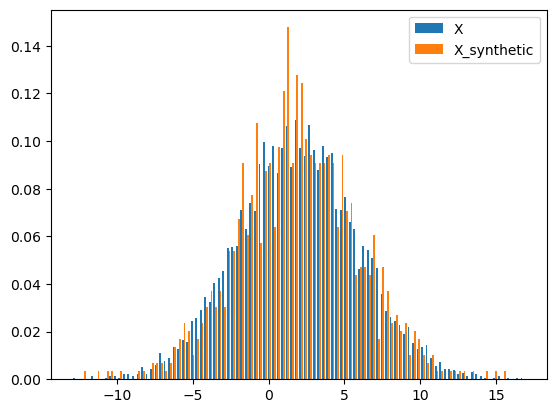

In [46]:
plt.figure()
plt.hist([X, X_synthetic], bins=100, density=True)
plt.legend(['X', 'X_synthetic'])
plt.show();

- **Optimization and compression:** Probability distribution fitting can be used to optimize various parameters of a probability distribution, such as the mean and variance, to best fit the data. Finding the best parameters can help to better understand the data. In addition, if hundreds of thousands of observations can be described with only the loc, scale, and arg parameters, it is a very strong compression of the data.

- **An informal investigation** of the properties of the input dataset is a very natural use of density estimates. Density estimates can give valuable indications of skewness and multimodality in the data. In some cases, they will yield conclusions that may then be regarded as self-evidently true, while in others, they will point the way to further analysis and data collection.

- **Testing hypotheses:** Probability distribution fitting can be used to test hypotheses about the underlying probability distribution of a data set. For example, one can use a goodness-of-fit test to compare the data to a normal distribution or a chi-squared test to compare the data to a Poisson distribution.

- **Modeling:** Probability distribution fitting can be used to model complex systems such as weather patterns, stock market trends, biology, population dynamics, and predictive maintenance. By fitting a probability distribution to historical data, it is possible to extract valuable insights and create a model that can be used to make predictions about future behavior.